In [4]:
from plot_utils_radpathdqn import *

In [5]:
seeds = ['3007','2010','2111','0412','1802']

/home/biswajit/Documents/DeepRL/PLOTS/random_seed_test/
/home/biswajit/Documents/DeepRL/PLOTS/random_seed_test/
/home/biswajit/Documents/DeepRL/PLOTS/random_seed_test/
/home/biswajit/Documents/DeepRL/PLOTS/random_seed_test/
/home/biswajit/Documents/DeepRL/PLOTS/random_seed_test/


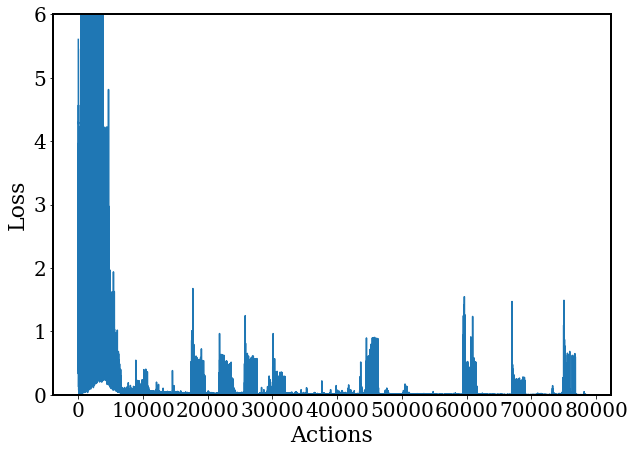

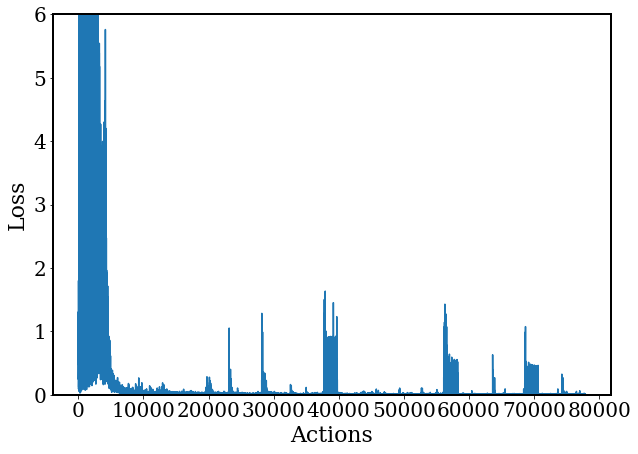

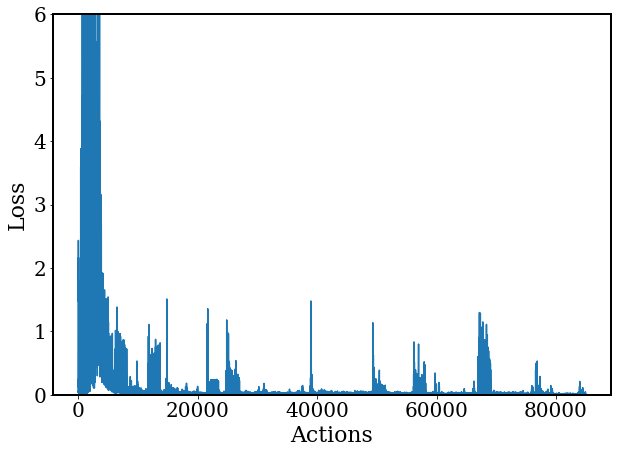

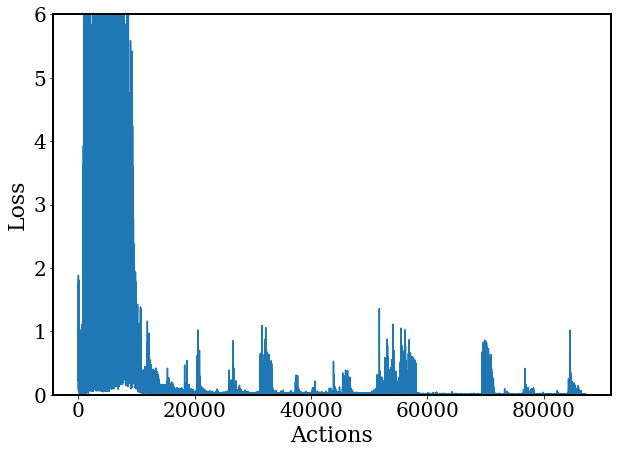

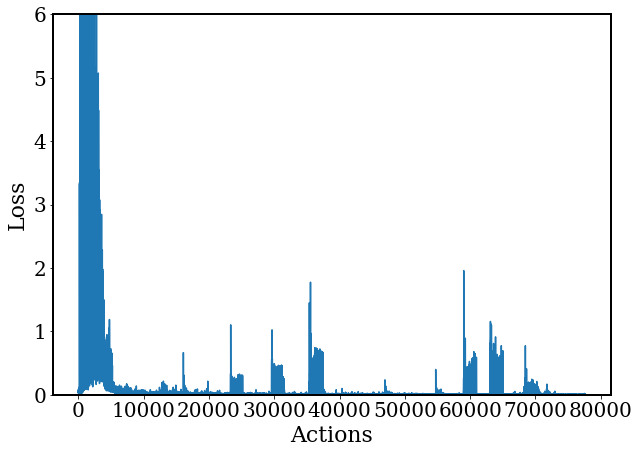

In [6]:
for seed in seeds:
    #path = '/home/biswajit/Documents/DeepRL/AutoDqn/two_sources/seed_%s'% seed
    path = '/home/biswajit/Documents/DeepRL/PLOTS/random_seed_test/'
    system_description = "seed%s"%seed
    print(path)
    plot_loss(path,system_description)

In [16]:
def multiseed_plot_loss(path,system_description,seeds=['3007','2010','2111','0412','1802']):
    
    import matplotlib.font_manager as font_manager
    import matplotlib
    import matplotlib.pyplot as plt
    import _pickle as cPickle

    matplotlib.rcParams.update({'font.size': 20})
    matplotlib.rcParams['font.family'] = ['DejaVu Serif']
    font = font_manager.FontProperties(family='DejaVu Serif',
                                       weight='normal',
                                       style='normal', size=20)

    matplotlib.rc('axes', linewidth=2)
    
    fig, ax = plt.subplots(figsize=(10,8))
    
    seeds = seeds
    
    for seed in seeds:
        system_description = "seed%s"%seed
        with open(r"%s/losses_%s.pickle"% (path, system_description), "rb") as input_file:
            losses = cPickle.load(input_file)
            ax.plot(losses)
    
    ax.set_xlabel("Actions",fontsize=22)
    ax.set_ylabel("Loss",fontsize=22)
    ax.set_ylim(0,20)
    
    
    plt.savefig('loss_plot_%s.png'%(system_description),bbox_inches='tight')
    
    return 

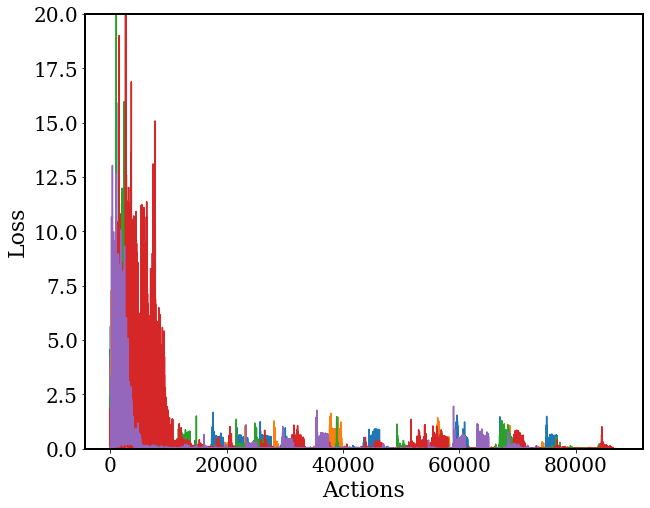

In [17]:
multiseed_plot_loss(path,system_description,seeds=['3007','2010','2111','0412','1802'])

In [203]:
def multiseedplot_running_mean_of_avg_reward(path,system_description,seeds=['3007','2010','2111','0412','1802']):
    
    import matplotlib.font_manager as font_manager
    import matplotlib
    import matplotlib.pyplot as plt
    import seaborn as sns
    import _pickle as cPickle
    import numpy as np
    import matplotlib.patches as mpatches

    matplotlib.rc_file_defaults()
    matplotlib.rcParams.update({'font.size': 20})
    matplotlib.rcParams['font.family'] = ['DejaVu Serif']
    font = font_manager.FontProperties(family='DejaVu Serif',
                                       weight='normal',
                                       style='normal', size=20)

    matplotlib.rc('axes', linewidth=2)
    
    fig, ax = plt.subplots(figsize=(10,8))
        
    def running_mean(x, N):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[N:] - cumsum[:-N]) / float(N)
    
    colors = ['green','red','purple','blue','grey']
    for color, seed in zip(colors,seeds):
        system_description = "seed%s"%seed
        with open(r"%s/rewards_per_game_%s.pickle"% (path, system_description), "rb") as input_file:
            rewards_per_game = cPickle.load(input_file)

            mov_av = running_mean(rewards_per_game, 20)[1:]
            print(len(mov_av))

            std = []
            for ndx, each in enumerate(rewards_per_game):
                if ndx > 19:
                    std.append(np.std(rewards_per_game[ndx-19:ndx]))
            ax.plot(mov_av, color, label='mean_1')
            ax.fill_between(np.arange(1,len(std)+1,1), mov_av + std, mov_av - std, color=color, alpha=0.1)
            


    ax.set_xlabel('Episodes')
    ax.set_ylabel('Reward')
    ax.set_xlim((0,2000))
    ax.set_ylim((-22,15))
    # plt.legend(['seed 1','','seed 2','','seed 3','seed 4','seed 5'],frameon=False)
    
    green_patch = mpatches.Patch(color='green', label='seed 1')
    red_patch = mpatches.Patch(color='red', label='seed 2')
    purple_patch = mpatches.Patch(color='purple', label='seed 3')
    blue_patch = mpatches.Patch(color='blue', label='seed 4')
    grey_patch = mpatches.Patch(color='grey', label='seed 5')
    
    plt.legend(handles=[green_patch,red_patch,purple_patch,blue_patch,grey_patch], frameon=False,fontsize=20,loc=4)
    #plt.savefig('multiseed_reward_vs_episodes_running_mean_with_std.png',bbox_inches='tight', dpi=600)
    plt.savefig('multiseed_reward_vs_episodes_running_mean_with_std.pdf',bbox_inches='tight')
    
    return

4984
4986
4990
4987
4984


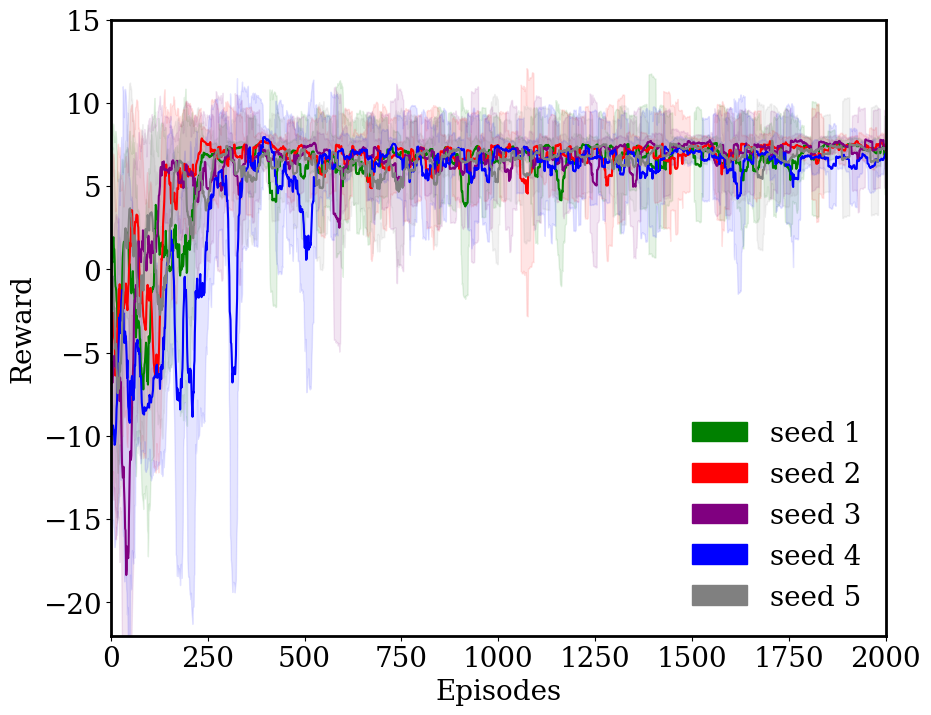

In [204]:
multiseedplot_running_mean_of_avg_reward(path,system_description,seeds=['3007','2010','2111','0412','1802'])

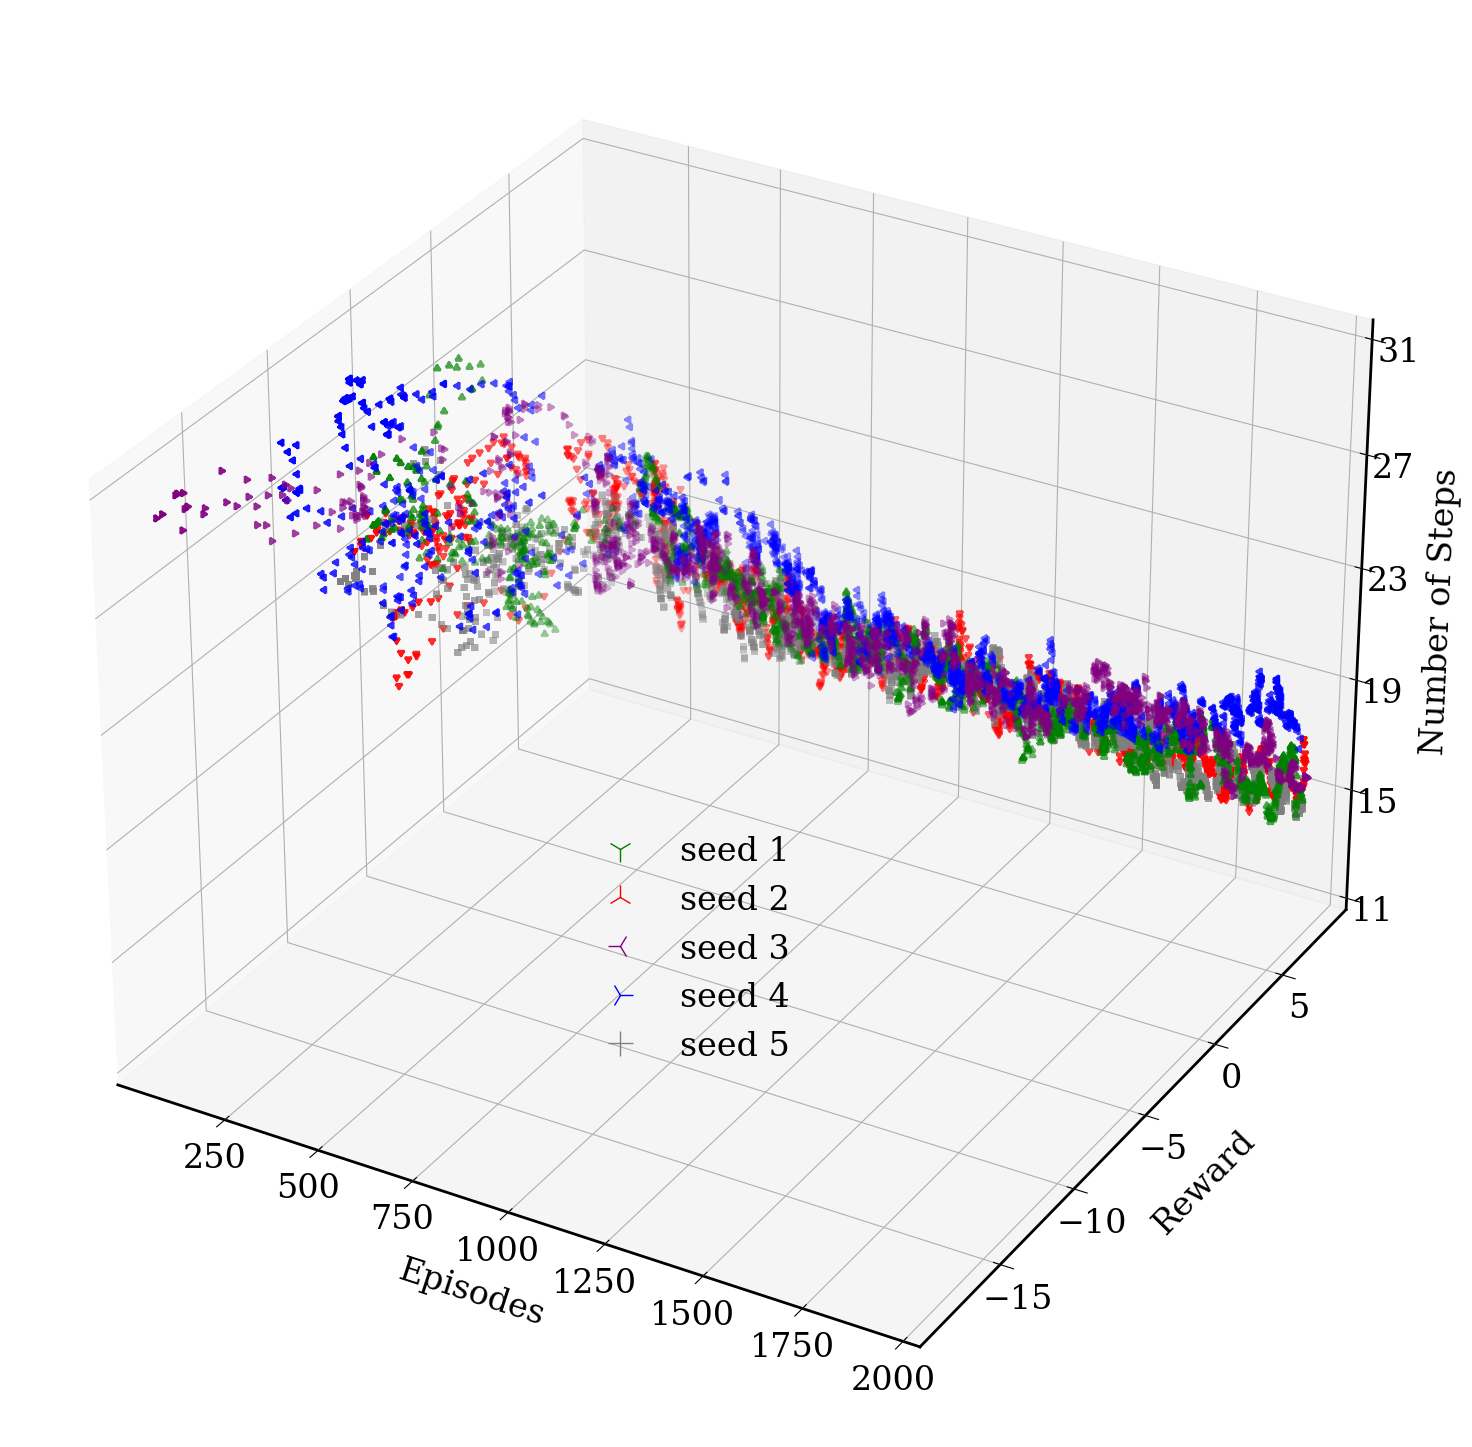

In [202]:
import _pickle as cPickle
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.font_manager as font_manager
import matplotlib
import matplotlib.pyplot as plt
import _pickle as cPickle
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D


matplotlib.rcParams.update({'font.size': 24})
matplotlib.rcParams['font.family'] = ['DejaVu Serif']
font = font_manager.FontProperties(family='DejaVu Serif',
                                       weight='normal',
                                       style='normal', size=24)

matplotlib.rc('axes', linewidth=2)




def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
   
fig = plt.figure(figsize=(15,19)) 
ax = fig.add_subplot(111, projection='3d')

colors = ['green','red','purple','blue','grey']
marker = ['1','2','3','4','+']
for ndx, (color, seed) in enumerate(zip(colors,seeds)):
    system_description = "seed%s"%seed            
    with open(r"%s/rewards_per_game_%s.pickle"% (path, system_description), "rb") as input_file:
        rewards_per_game = cPickle.load(input_file)

    with open(r"%s/moves_per_game_%s.pickle"% (path, system_description), "rb") as input_file:
        moves_per_game = cPickle.load(input_file)
    
        reward_mov_av = running_mean(rewards_per_game, 20)[1:]
        steps_mov_av = running_mean(moves_per_game, 20)[1:]
        xs = np.arange(1,len(reward_mov_av)+1,1)
        xs = xs[:2000]
        ys = reward_mov_av[:2000]
        zs = steps_mov_av[:2000]
        ax.scatter(xs, ys, zs, color=color,marker=marker[ndx],lw=5)
        ax.set_xlim(1,2000)
    
        

ax.set_xlabel('Episodes',labelpad=20)
ax.set_ylabel('Reward',labelpad=20)
ax.set_zlabel('Number of Steps',labelpad=15)
ax.set_zticks(np.arange(11,32,4))
#ax.set_yticks(np.arange(-20,26,5))

green_patch = mlines.Line2D([], [], color=colors[0], marker=marker[0], linestyle='None',lw=5,
                          markersize=18, label='seed 1')
red_patch = mlines.Line2D([], [], color=colors[1], marker=marker[1], linestyle='None',lw=5,
                          markersize=18, label='seed 2')
purple_patch = mlines.Line2D([], [], color=colors[2], marker=marker[2], linestyle='None',lw=5,
                          markersize=18, label='seed 3')
blue_patch = mlines.Line2D([], [], color=colors[3], marker=marker[3], linestyle='None',lw=5,
                          markersize=18, label='seed 4')
grey_patch = mlines.Line2D([], [], color=colors[4], marker=marker[4], linestyle='None',lw=5,
                          markersize=18, label='seed 5')

mpl_toolkits.mplot3d.proj3d.proj_transform(xs,ys,zs, ax.get_proj())

f = lambda xs,ys,zs: mpl_toolkits.mplot3d.proj3d.proj_transform(xs,ys,zs, ax.get_proj())[:2]

plt.legend(handles=[green_patch,red_patch,purple_patch,blue_patch,grey_patch], frameon=False,fontsize=24,\
           bbox_to_anchor=f(1000,0,15), bbox_transform=ax.transData)

fig.tight_layout()
#plt.savefig('3d_multiseed_reward_vs_episodes_vs_moves_running_mean_with_std.png',bbox_inches='tight', dpi=600)
plt.savefig('3d_multiseed_reward_vs_episodes_vs_moves_running_mean_with_std.pdf',bbox_inches='tight')

In [ ]:
def plot_3d_multiseedplot_running_mean_of_avg_reward(path,system_description,marker = ['1','2','3','4','+'], colors = ['green','red','purple','blue','grey'], seeds=['3007','2010','2111','0412','1802']):
    import _pickle as cPickle
    import numpy as np
    from matplotlib.colors import LogNorm
    import matplotlib.font_manager as font_manager
    import matplotlib
    import matplotlib.pyplot as plt
    import _pickle as cPickle
    import matplotlib.patches as mpatches
    import matplotlib.lines as mlines
    import mpl_toolkits
    from mpl_toolkits.mplot3d import Axes3D


    matplotlib.rcParams.update({'font.size': 24})
    matplotlib.rcParams['font.family'] = ['DejaVu Serif']
    font = font_manager.FontProperties(family='DejaVu Serif',
                                           weight='normal',
                                           style='normal', size=24)

    matplotlib.rc('axes', linewidth=2)

    def running_mean(x, N):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[N:] - cumsum[:-N]) / float(N)

    fig = plt.figure(figsize=(15,19)) 
    ax = fig.add_subplot(111, projection='3d')

    colors = colors
    marker = marker
    
    for ndx, (color, seed) in enumerate(zip(colors,seeds)):
        system_description = "seed%s"%seed            
        with open(r"%s/rewards_per_game_%s.pickle"% (path, system_description), "rb") as input_file:
            rewards_per_game = cPickle.load(input_file)

        with open(r"%s/moves_per_game_%s.pickle"% (path, system_description), "rb") as input_file:
            moves_per_game = cPickle.load(input_file)

            reward_mov_av = running_mean(rewards_per_game, 20)[1:]
            steps_mov_av = running_mean(moves_per_game, 20)[1:]
            xs = np.arange(1,len(reward_mov_av)+1,1)
            xs = xs[:2000]
            ys = reward_mov_av[:2000]
            zs = steps_mov_av[:2000]
            ax.scatter(xs, ys, zs, color=color,marker=marker[ndx],lw=5)
            ax.set_xlim(1,2000)



    ax.set_xlabel('Episodes',labelpad=20)
    ax.set_ylabel('Reward',labelpad=20)
    ax.set_zlabel('Number of Steps',labelpad=15)
    ax.set_zticks(np.arange(11,32,4))
    #ax.set_yticks(np.arange(-20,26,5))

    green_patch = mlines.Line2D([], [], color=colors[0], marker=marker[0], linestyle='None',lw=5,
                              markersize=18, label='seed 1')
    red_patch = mlines.Line2D([], [], color=colors[1], marker=marker[1], linestyle='None',lw=5,
                              markersize=18, label='seed 2')
    purple_patch = mlines.Line2D([], [], color=colors[2], marker=marker[2], linestyle='None',lw=5,
                              markersize=18, label='seed 3')
    blue_patch = mlines.Line2D([], [], color=colors[3], marker=marker[3], linestyle='None',lw=5,
                              markersize=18, label='seed 4')
    grey_patch = mlines.Line2D([], [], color=colors[4], marker=marker[4], linestyle='None',lw=5,
                              markersize=18, label='seed 5')

    mpl_toolkits.mplot3d.proj3d.proj_transform(xs,ys,zs, ax.get_proj())

    f = lambda xs,ys,zs: mpl_toolkits.mplot3d.proj3d.proj_transform(xs,ys,zs, ax.get_proj())[:2]

    plt.legend(handles=[green_patch,red_patch,purple_patch,blue_patch,grey_patch], frameon=False,fontsize=24,\
               bbox_to_anchor=f(1000,0,15), bbox_transform=ax.transData)

    fig.tight_layout()
    #plt.savefig('3d_multiseed_reward_vs_episodes_vs_moves_running_mean_with_std.png',bbox_inches='tight', dpi=600)
    plt.savefig('3d_multiseed_reward_vs_episodes_vs_moves_running_mean_with_std.pdf',bbox_inches='tight')
    
    return

In [1100]:
def plot_3d_multicomboplot_running_mean_of_avg_reward(path,system_description,marker = ['1','2','3','4','+'], \
                                                     colors = ['green','red','purple','blue','grey'],\
                                                     seeds=['3007','2010','2111','0412','1802']):
    import _pickle as cPickle
    import numpy as np
    from matplotlib.colors import LogNorm
    import matplotlib.font_manager as font_manager
    import matplotlib
    import matplotlib.pyplot as plt
    import _pickle as cPickle
    import matplotlib.patches as mpatches
    import matplotlib.lines as mlines
    import mpl_toolkits
    from mpl_toolkits.mplot3d import Axes3D


    matplotlib.rcParams.update({'font.size': 24})
    matplotlib.rcParams['font.family'] = ['DejaVu Serif']
    font = font_manager.FontProperties(family='DejaVu Serif',
                                           weight='normal',
                                           style='normal', size=24)

    matplotlib.rc('axes', linewidth=2)

    def running_mean(x, N):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[N:] - cumsum[:-N]) / float(N)

    fig = plt.figure(figsize=(15,19)) 
    ax = fig.add_subplot(111, projection='3d')

    colors = colors
    marker = marker
    
    for ndx, (color, seed) in enumerate(zip(colors,seeds)):
        with open(r"%s/rewards_per_game_%s%s.pickle"% (path[ndx], system_description,seeds[ndx]), "rb") as input_file:
            rewards_per_game = cPickle.load(input_file)

        with open(r"%s/moves_per_game_%s%s.pickle"% (path[ndx], system_description,seeds[ndx]), "rb") as input_file:
            moves_per_game = cPickle.load(input_file)

            reward_mov_av = running_mean(rewards_per_game, 100)[1:]
            steps_mov_av = running_mean(moves_per_game, 100)[1:]
            xs = np.arange(1,len(reward_mov_av)+1,1)
            xs = xs[:5000]
            ys = reward_mov_av[:5000]
            zs = steps_mov_av[:5000]
            ax.scatter(xs, ys, zs, color=color,marker=marker[ndx],lw=1,s=100)
            ax.set_xlim(1,5000)
            ax.set_ylim(-160,50)
            ax.set_zlim(5,31)
            if max(ys):
                x = xs[np.argmax(ys)]
                z = zs[np.argmax(ys)]
                ax.scatter(x, max(ys), z, marker="*",lw=5,s=900,facecolor=color,edgecolor='black')

            ax.plot(xs, zs, color=color, zdir='y',lw=0.7,zs=50)
            #ax.plot(ys, zs, color=color, zdir='x')
            ax.plot(xs, ys, color=color, zdir='z',lw=0.7,zs=5)
            

    
    ax.set_xlabel('Episodes',labelpad=20)
    ax.set_ylabel('Reward',labelpad=20)
    ax.set_zlabel('Number of Steps',labelpad=15)
    ax.set_zticks(np.arange(11,32,4))
    #ax.set_yticks(np.arange(-20,26,5))

    green_patch = mlines.Line2D([], [], color=colors[0], marker=marker[0], linestyle='None',lw=5,
                              markersize=18, label=r'exp$_v$ & S$_v$')
    red_patch = mlines.Line2D([], [], color=colors[1], marker=marker[1], linestyle='None',lw=5,
                              markersize=18, label=r'exp$_v$ & S$_{improv}$')
    purple_patch = mlines.Line2D([], [], color=colors[2], marker=marker[2], linestyle='None',lw=5,
                              markersize=18, label=r'exp$_r$ & S$_v$')
    blue_patch = mlines.Line2D([], [], color=colors[3], marker=marker[3], linestyle='None',lw=5,
                              markersize=18, label=r'exp$_r$ & S$_{improv}$')
    grey_patch = mlines.Line2D([], [], color=colors[4], marker=marker[4], linestyle='None',lw=5,
                              markersize=18, label=r'exp$_{pr}$ & S$_v$')
    brown_patch = mlines.Line2D([], [], color=colors[5], marker=marker[5], linestyle='None',lw=5,
                              markersize=18, label=r'exp$_{pr}$ & S$_{improv}$')

    mpl_toolkits.mplot3d.proj3d.proj_transform(xs,ys,zs, ax.get_proj())

    f = lambda xs,ys,zs: mpl_toolkits.mplot3d.proj3d.proj_transform(xs,ys,zs, ax.get_proj())[:2]

    plt.legend(handles=[green_patch,red_patch,purple_patch,blue_patch,grey_patch,brown_patch], \
               frameon=False,fontsize=20,\
               bbox_to_anchor=f(-100,-100,23), bbox_transform=ax.transData)
    #ax.view_init(110,15)
    fig.tight_layout()
    
    #plt.savefig('3d_multiseed_reward_vs_episodes_vs_moves_running_mean_with_std.png',bbox_inches='tight', dpi=600)
    plt.savefig('3d_multicombo_reward_vs_episodes_vs_moves_running_mean_with_std.pdf',bbox_inches='tight')
    
    return

In [1101]:
path = np.array(['/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ev_1_s_0',\
       '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ev_1_s_1',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ef_1_s_0',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ef_1_s_1',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ep_1_s_0',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ep_1_s_1'])
system_description = 'static_5000_epochs_2000_memsize_30_batch_size_600_sync_freq_1e-3_lr_leaky_func__S1_25_6_0_S2_25_6_9_S3_5_0_6_'

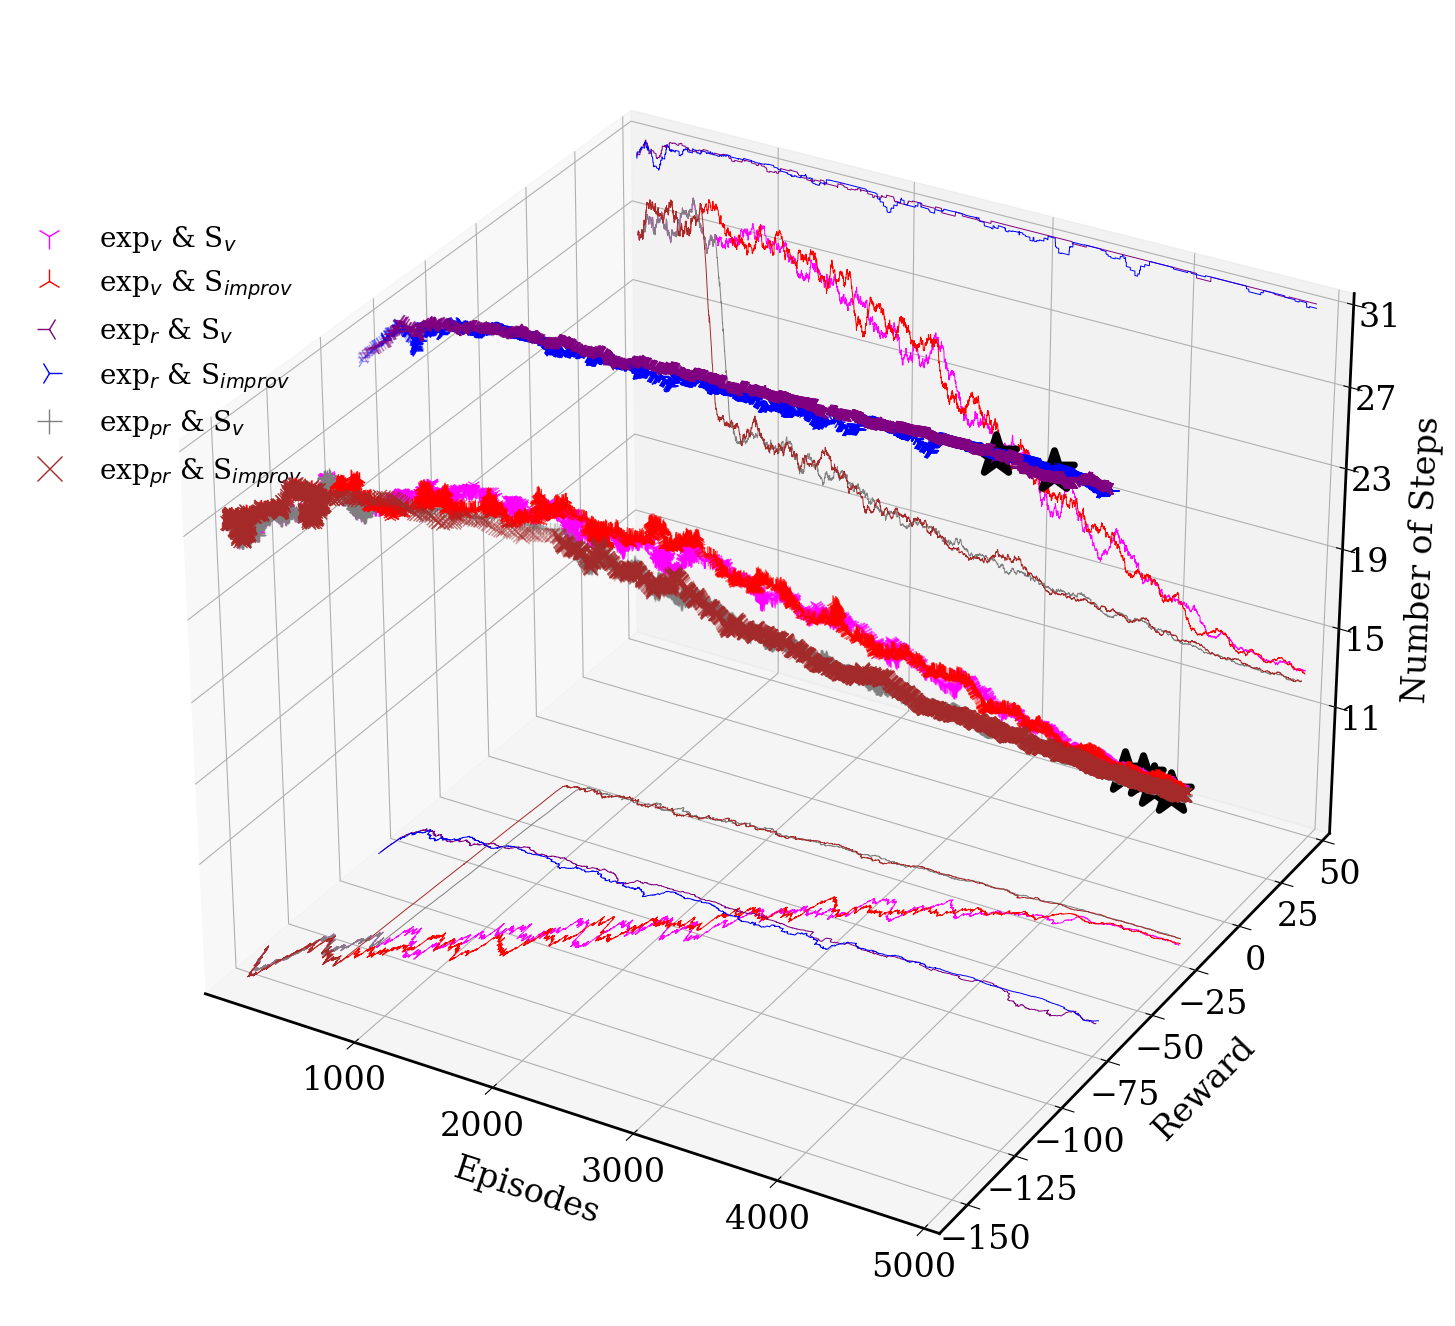

In [1102]:
plot_3d_multicomboplot_running_mean_of_avg_reward(path,system_description,
                                                  marker = ['1','2','3','4','+','x'], 
                                                  colors = ['magenta','red','purple','blue','grey','brown'],
                                                  seeds=['sync_improv_False_vanilla_exploration_True_partially_blind_False_',
                                                        'sync_improv_True_vanilla_exploration_True_partially_blind_False_',
                                                        'sync_improv_False_vanilla_exploration_False_partially_blind_False_',
                                                        'sync_improv_True_vanilla_exploration_False_partially_blind_False_',
                                                        'sync_improv_False_vanilla_exploration_False_partially_blind_True_',
                                                       'sync_improv_True_vanilla_exploration_False_partially_blind_True_'])

In [ ]:
def multiseedplot_running_mean_of_avg_reward(path,system_description,seeds=['3007','2010','2111','0412','1802']):
    
    import matplotlib.font_manager as font_manager
    import matplotlib
    import matplotlib.pyplot as plt
    import seaborn as sns
    import _pickle as cPickle
    import numpy as np
    import matplotlib.patches as mpatches

    matplotlib.rc_file_defaults()
    matplotlib.rcParams.update({'font.size': 20})
    matplotlib.rcParams['font.family'] = ['DejaVu Serif']
    font = font_manager.FontProperties(family='DejaVu Serif',
                                       weight='normal',
                                       style='normal', size=20)

    matplotlib.rc('axes', linewidth=2)
    
    fig, ax = plt.subplots(figsize=(10,8))
        
    def running_mean(x, N):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[N:] - cumsum[:-N]) / float(N)
    
    colors = ['green','red','purple','blue','grey']
    for color, seed in zip(colors,seeds):
        system_description = "seed%s"%seed
        with open(r"%s/rewards_per_game_%s.pickle"% (path, system_description), "rb") as input_file:
            rewards_per_game = cPickle.load(input_file)

            mov_av = running_mean(rewards_per_game, 20)[1:]
            print(len(mov_av))

            std = []
            for ndx, each in enumerate(rewards_per_game):
                if ndx > 19:
                    std.append(np.std(rewards_per_game[ndx-19:ndx]))
            ax.plot(mov_av, color, label='mean_1')
            ax.fill_between(np.arange(1,len(std)+1,1), mov_av + std, mov_av - std, color=color, alpha=0.1)
            


    ax.set_xlabel('Episodes')
    ax.set_ylabel('Reward')
    ax.set_xlim((0,2000))
    ax.set_ylim((-22,15))
    # plt.legend(['seed 1','','seed 2','','seed 3','seed 4','seed 5'],frameon=False)
    
    green_patch = mpatches.Patch(color='green', label='seed 1')
    red_patch = mpatches.Patch(color='red', label='seed 2')
    purple_patch = mpatches.Patch(color='purple', label='seed 3')
    blue_patch = mpatches.Patch(color='blue', label='seed 4')
    grey_patch = mpatches.Patch(color='grey', label='seed 5')
    
    plt.legend(handles=[green_patch,red_patch,purple_patch,blue_patch,grey_patch], frameon=False,fontsize=20,loc=4)
    #plt.savefig('multiseed_reward_vs_episodes_running_mean_with_std.png',bbox_inches='tight', dpi=600)
    plt.savefig('multiseed_reward_vs_episodes_running_mean_with_std.pdf',bbox_inches='tight')
    
    return

In [1107]:
def plot_2d_multicomboplot_running_mean_of_avg_reward(path,system_description,marker = ['1','2','3','4','+'], \
                                                     colors = ['green','red','purple','blue','grey'],\
                                                     seeds=['3007','2010','2111','0412','1802']):
    import _pickle as cPickle
    import numpy as np
    from matplotlib.colors import LogNorm
    import matplotlib.font_manager as font_manager
    import matplotlib
    import matplotlib.pyplot as plt
    import _pickle as cPickle
    import matplotlib.patches as mpatches
    import matplotlib.lines as mlines
    import mpl_toolkits
    from mpl_toolkits.mplot3d import Axes3D


    matplotlib.rcParams.update({'font.size': 24})
    matplotlib.rcParams['font.family'] = ['DejaVu Serif']
    font = font_manager.FontProperties(family='DejaVu Serif',
                                           weight='normal',
                                           style='normal', size=24)

    matplotlib.rc('axes', linewidth=2)

    def running_mean(x, N):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[N:] - cumsum[:-N]) / float(N)

    fig = plt.figure(figsize=(15,10)) 
    ax = fig.add_subplot(111)

    colors = colors
    marker = marker
    
    for ndx, (color, seed) in enumerate(zip(colors,seeds)):
        with open(r"%s/rewards_per_game_%s%s.pickle"% (path[ndx], system_description,seeds[ndx]), "rb") as input_file:
            rewards_per_game = cPickle.load(input_file)

        with open(r"%s/moves_per_game_%s%s.pickle"% (path[ndx], system_description,seeds[ndx]), "rb") as input_file:
            moves_per_game = cPickle.load(input_file)

            reward_mov_av = running_mean(rewards_per_game, 100)[1:]
            steps_mov_av = running_mean(moves_per_game, 100)[1:]
            
            std = []
            for jdx, each in enumerate(rewards_per_game):
                if jdx > 99:
                    std.append(np.std(rewards_per_game[jdx-100:jdx]))
            ax.plot(reward_mov_av, color, label='mean_1',marker=marker[ndx])
            ax.fill_between(np.arange(1,len(std)+1,1), reward_mov_av[:len(std)] + std, reward_mov_av[:len(std)]\
                            - std, color=color, alpha=0.1)
            

    ax.set_xlim(1,5000)
    ax.set_xlabel('Episodes',labelpad=20)
    ax.set_ylabel('Reward',labelpad=20)

    green_patch = mlines.Line2D([], [], color=colors[0], marker=marker[0], linestyle='None',lw=5,
                              markersize=18, label=r'exp$_v$ & S$_v$')
    red_patch = mlines.Line2D([], [], color=colors[1], marker=marker[1], linestyle='None',lw=5,
                              markersize=18, label=r'exp$_v$ & S$_{improv}$')
    purple_patch = mlines.Line2D([], [], color=colors[2], marker=marker[2], linestyle='None',lw=5,
                              markersize=18, label=r'exp$_r$ & S$_v$')
    blue_patch = mlines.Line2D([], [], color=colors[3], marker=marker[3], linestyle='None',lw=5,
                              markersize=18, label=r'exp$_r$ & S$_{improv}$')
    grey_patch = mlines.Line2D([], [], color=colors[4], marker=marker[4], linestyle='None',lw=5,
                              markersize=18, label=r'exp$_{pr}$ & S$_v$')
    brown_patch = mlines.Line2D([], [], color=colors[5], marker=marker[5], linestyle='None',lw=5,
                              markersize=18, label=r'exp$_{pr}$ & S$_{improv}$')

    
    plt.legend(handles=[green_patch,red_patch,purple_patch,blue_patch,grey_patch,brown_patch], \
               frameon=False,fontsize=20)
    #ax.view_init(110,15)
    fig.tight_layout()
    
    #plt.savefig('3d_multiseed_reward_vs_episodes_vs_moves_running_mean_with_std.png',bbox_inches='tight', dpi=600)
    plt.savefig('2d_multicombo_reward_vs_episodes_running_mean_555.pdf',bbox_inches='tight')
    
    return

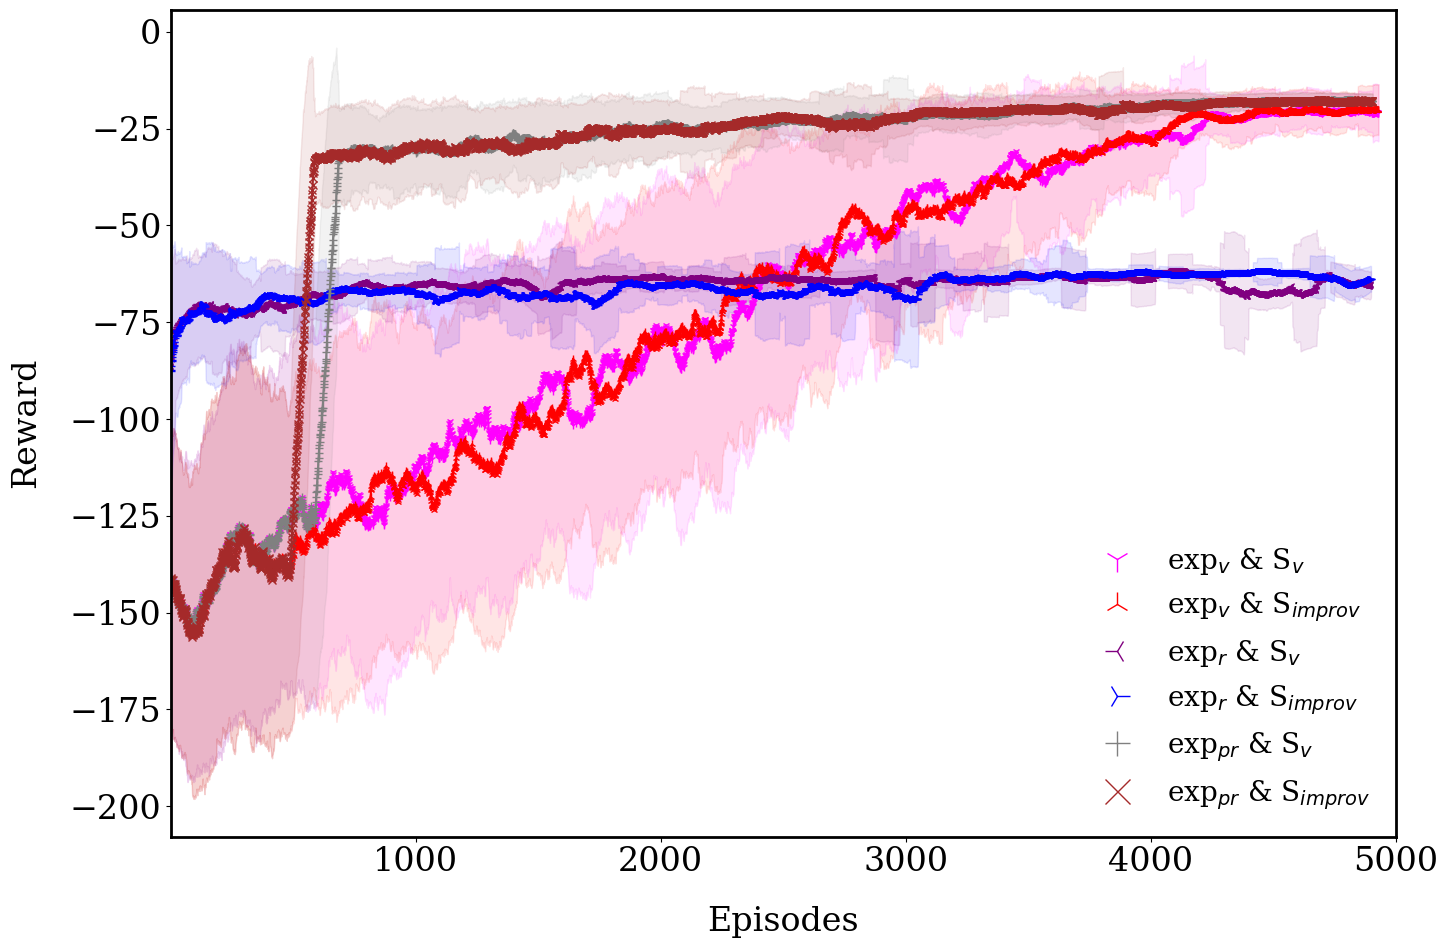

In [1106]:
path = np.array(['/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ev_1_s_0',\
       '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ev_1_s_1',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ef_1_s_0',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ef_1_s_1',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ep_1_s_0',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ep_1_s_1'])
system_description = 'static_5000_epochs_2000_memsize_30_batch_size_600_sync_freq_1e-3_lr_leaky_func__S1_25_6_0_S2_25_6_9_S3_5_0_6_'


plot_2d_multicomboplot_running_mean_of_avg_reward(path,system_description,
                                                  marker = ['1','2','3','4','+','x'], 
                                                  colors = ['magenta','red','purple','blue','grey','brown'],
                                                  seeds=['sync_improv_False_vanilla_exploration_True_partially_blind_False_',
                                                        'sync_improv_True_vanilla_exploration_True_partially_blind_False_',
                                                        'sync_improv_False_vanilla_exploration_False_partially_blind_False_',
                                                        'sync_improv_True_vanilla_exploration_False_partially_blind_False_',
                                                        'sync_improv_False_vanilla_exploration_False_partially_blind_True_',
                                                       'sync_improv_True_vanilla_exploration_False_partially_blind_True_'])

In [ ]:
path = np.array(['/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ev_1_s_0',\
       '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ev_1_s_1',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ef_1_s_0',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ef_1_s_1',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ep_1_s_0',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ep_1_s_1'])
system_description = 'static_5000_epochs_2000_memsize_30_batch_size_600_sync_freq_1e-3_lr_leaky_func__S1_25_6_0_S2_25_6_9_S3_5_0_6_'


plot_2d_multicomboplot_running_mean_of_avg_reward(path,system_description,
                                                  marker = ['1','2','3','4','+','x'], 
                                                  colors = ['magenta','red','purple','blue','grey','brown'],
                                                  seeds=['sync_improv_False_vanilla_exploration_True_partially_blind_False_',
                                                        'sync_improv_True_vanilla_exploration_True_partially_blind_False_',
                                                        'sync_improv_False_vanilla_exploration_False_partially_blind_False_',
                                                        'sync_improv_True_vanilla_exploration_False_partially_blind_False_',
                                                        'sync_improv_False_vanilla_exploration_False_partially_blind_True_',
                                                       'sync_improv_True_vanilla_exploration_False_partially_blind_True_'])

In [1039]:
def plot_winratio_winmoves(path,system_description,
                        marker = ['1','2','3','4','+','x'], 
                        colors = ['magenta','red','purple','blue','grey','brown'],
                        seeds=['sync_improv_False_vanilla_exploration_True_partially_blind_False_',
                                'sync_improv_True_vanilla_exploration_True_partially_blind_False_',
                                'sync_improv_False_vanilla_exploration_False_partially_blind_False_',
                                'sync_improv_True_vanilla_exploration_False_partially_blind_False_',
                                'sync_improv_False_vanilla_exploration_False_partially_blind_True_',
                                'sync_improv_True_vanilla_exploration_False_partially_blind_True_']):
    
    import matplotlib.font_manager as font_manager
    import matplotlib
    import matplotlib.pyplot as plt
    import _pickle as cPickle

    matplotlib.rcParams.update({'font.size': 20})
    matplotlib.rcParams['font.family'] = ['DejaVu Serif']
    font = font_manager.FontProperties(family='DejaVu Serif',
                                       weight='normal',
                                       style='normal', size=20)

    matplotlib.rc('axes', linewidth=2)
    
    fig, axs = plt.subplots(figsize=(12,6),nrows=1, ncols=2)

    colors = colors
    marker = marker
    
    def running_mean(x, N):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[N:] - cumsum[:-N]) / float(N)
    
    for ndx, (color, seed) in enumerate(zip(colors,seeds)):
    
        with open(r"%s/win_lose_array_%s%s.pickle"% (path[ndx], system_description,seeds[ndx]), "rb") as input_file:
            win_lose_array = cPickle.load(input_file)

        with open(r"%s/ratio_list_%s%s.pickle"% (path[ndx], system_description,seeds[ndx]), "rb") as input_file:
            ratio_list = cPickle.load(input_file)

        with open(r"%s/moves_per_game_%s%s.pickle"% (path[ndx], system_description,seeds[ndx]), "rb") as input_file:
            moves_per_game = cPickle.load(input_file)
    
        win_moves = [moves_per_game[vdx] for vdx, val in enumerate(np.array(win_lose_array).T[0])
                                 if val == 1]
    
    
        
        axs[0].plot([i*100 for i in ratio_list],color=color,lw=3)
        axs[0].set_xlabel("All Episodes")
        axs[0].set_ylabel("% of Win")
        axs[0].set_xlim(0,5000)

        axs[1].plot(running_mean(win_moves,100),color=color)
        axs[1].set_xlabel("Episodes (Win)")
        axs[1].set_ylabel("Steps")
        axs[1].set_xlim(0,len(running_mean(win_moves,100)))
        axs[1].set_ylim(9,25)
        
    

    
    green_patch = mpatches.Patch(color=colors[0], label=r'exp$_v$ & S$_v$')
    red_patch = mpatches.Patch(color=colors[1], label=r'exp$_v$ & S$_{improv}$')
    purple_patch = mpatches.Patch(color=colors[2], label=r'exp$_r$ & S$_v$')
    blue_patch = mpatches.Patch(color=colors[3], label=r'exp$_r$ & S$_{improv}$')
    grey_patch = mpatches.Patch(color=colors[4], label=r'exp$_{pr}$ & S$_v$')
    brown_patch = mpatches.Patch(color=colors[5], label=r'exp$_{pr}$ & S$_{improv}$')
    
    plt.legend(handles=[green_patch,red_patch,purple_patch,blue_patch,grey_patch,brown_patch],ncol=2,
               frameon=False,fontsize=12)

    fig.tight_layout()
    #plt.savefig('multicombo_ratio_winmoves_%s.png',bbox_inches='tight',dpi=600)
    plt.savefig('multicombo_ratio_winmoves_5_5_5.pdf',bbox_inches='tight',dpi=600)
    return 

/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


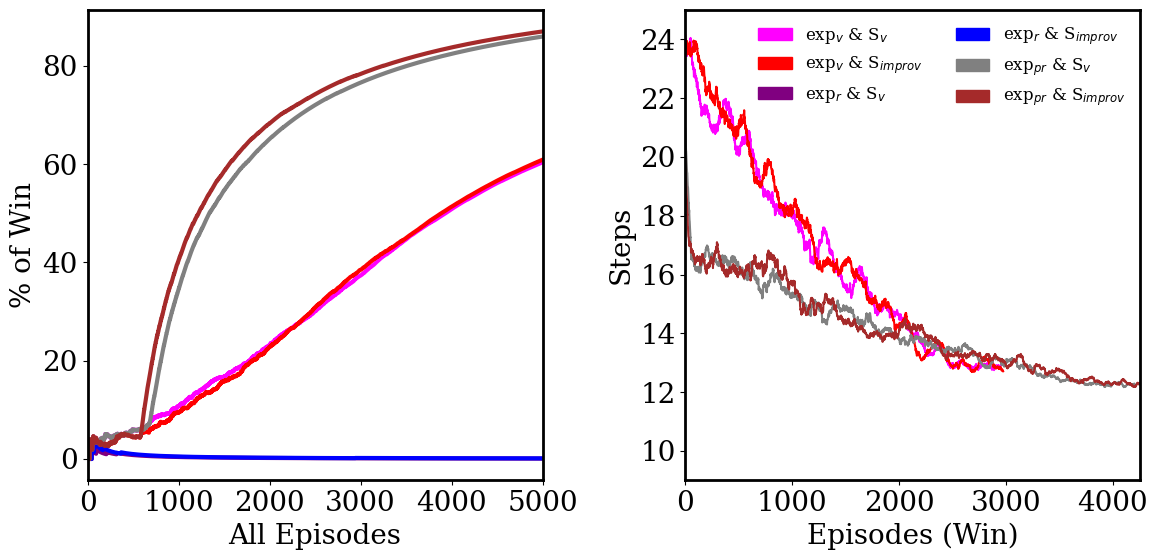

In [1038]:
path = np.array(['/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ev_1_s_0',\
       '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ev_1_s_1',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ef_1_s_0',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ef_1_s_1',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ep_1_s_0',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ep_1_s_1'])
system_description = 'static_5000_epochs_2000_memsize_30_batch_size_600_sync_freq_1e-3_lr_leaky_func__S1_25_6_0_S2_25_6_9_S3_5_0_6_'

plot_winratio_winmoves(path,system_description,
                        marker = ['1','2','3','4','+','x'], 
                        colors = ['magenta','red','purple','blue','grey','brown'],
                        seeds=['sync_improv_False_vanilla_exploration_True_partially_blind_False_',
                                'sync_improv_True_vanilla_exploration_True_partially_blind_False_',
                                'sync_improv_False_vanilla_exploration_False_partially_blind_False_',
                                'sync_improv_True_vanilla_exploration_False_partially_blind_False_',
                                'sync_improv_False_vanilla_exploration_False_partially_blind_True_',
                                'sync_improv_True_vanilla_exploration_False_partially_blind_True_'])


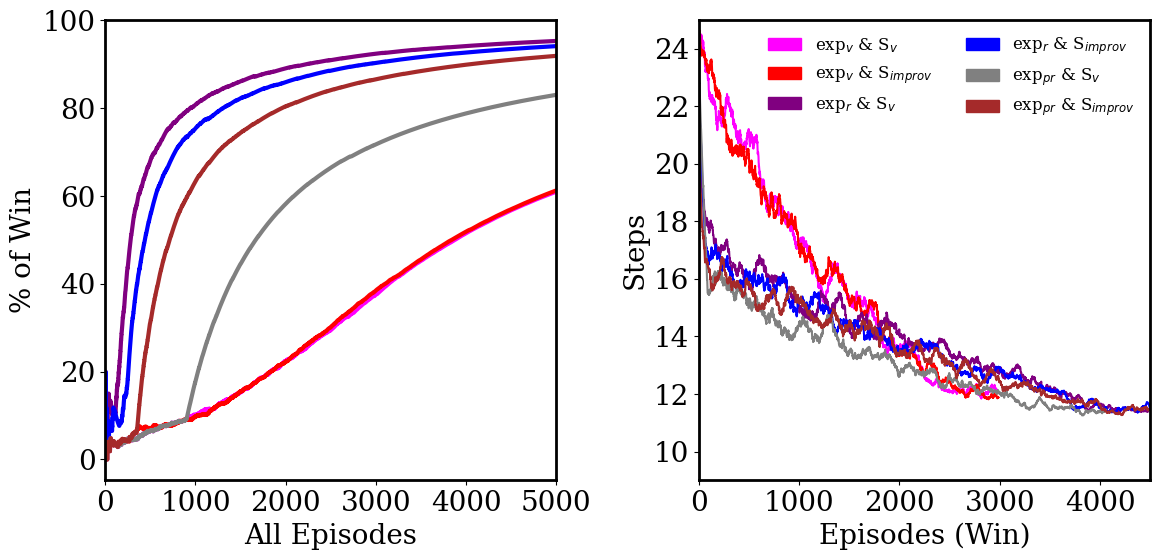

In [1040]:
path = np.array(['/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ev_1_s_0',\
       '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ev_1_s_1',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ef_1_s_0',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ef_1_s_1',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ep_1_s_0',\
        '/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ep_1_s_1'])
system_description = 'static_5000_epochs_2000_memsize_30_batch_size_600_sync_freq_1e-3_lr_leaky_func__S1_5_6_0_S2_5_6_9_S3_5_0_6_'

plot_winratio_winmoves(path,system_description,
                        marker = ['1','2','3','4','+','x'], 
                        colors = ['magenta','red','purple','blue','grey','brown'],
                        seeds=['sync_improv_False_vanilla_exploration_True_partially_blind_False_',
                                'sync_improv_True_vanilla_exploration_True_partially_blind_False_',
                                'sync_improv_False_vanilla_exploration_False_partially_blind_False_',
                                'sync_improv_True_vanilla_exploration_False_partially_blind_False_',
                                'sync_improv_False_vanilla_exploration_False_partially_blind_True_',
                                'sync_improv_True_vanilla_exploration_False_partially_blind_True_'])


In [1041]:
def plot_random_moves_distribution(path,system_description,
                        marker = ['1','2','3','4','+','x'], 
                        colors = ['magenta','red','purple','blue','grey','brown'],
                        seeds=['sync_improv_False_vanilla_exploration_True_partially_blind_False_',
                                'sync_improv_True_vanilla_exploration_True_partially_blind_False_',
                                'sync_improv_False_vanilla_exploration_False_partially_blind_False_',
                                'sync_improv_True_vanilla_exploration_False_partially_blind_False_',
                                'sync_improv_False_vanilla_exploration_False_partially_blind_True_',
                                'sync_improv_True_vanilla_exploration_False_partially_blind_True_']):
    
    import matplotlib.font_manager as font_manager
    import matplotlib
    import matplotlib.pyplot as plt
    import _pickle as cPickle

    matplotlib.rcParams.update({'font.size': 20})
    matplotlib.rcParams['font.family'] = ['DejaVu Serif']
    font = font_manager.FontProperties(family='DejaVu Serif',
                                       weight='normal',
                                       style='normal', size=20)

    matplotlib.rc('axes', linewidth=2)
    
    fig, axs = plt.subplots(figsize=(12,6),nrows=1, ncols=2)

    colors = colors
    marker = marker
    
    def running_mean(x, N):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[N:] - cumsum[:-N]) / float(N)
    random_actions_info_list = []
    for ndx, (color, seed) in enumerate(zip(colors,seeds)):
        
        with open(r"%s/random_actions_info_%s%s.pickle"% (path[ndx], system_description,seeds[ndx]), "rb") as input_file:
            random_actions_info = cPickle.load(input_file)
        random_actions_info_list.append(random_actions_info)
    
        with open(r"%s/win_lose_array_%s%s.pickle"% (path[ndx], system_description,seeds[ndx]), "rb") as input_file:
            win_lose_array = cPickle.load(input_file)

        with open(r"%s/ratio_list_%s%s.pickle"% (path[ndx], system_description,seeds[ndx]), "rb") as input_file:
            ratio_list = cPickle.load(input_file)

        with open(r"%s/moves_per_game_%s%s.pickle"% (path[ndx], system_description,seeds[ndx]), "rb") as input_file:
            moves_per_game = cPickle.load(input_file)
    
        win_moves = [moves_per_game[vdx] for vdx, val in enumerate(np.array(win_lose_array).T[0])
                                 if val == 1]
    
    
        
        axs[0].plot([i*100 for i in ratio_list],color=color,lw=3)
        axs[0].set_xlabel("All Episodes")
        axs[0].set_ylabel("% of Win")
        axs[0].set_xlim(0,5000)

        axs[1].plot(running_mean(win_moves,100),color=color)
        axs[1].set_xlabel("Episodes (Win)")
        axs[1].set_ylabel("Steps")
        axs[1].set_xlim(0,len(running_mean(win_moves,100)))
        axs[1].set_ylim(9,31)
        
    

    
    green_patch = mpatches.Patch(color=colors[0], label=r'exp$_v$ & S$_v$')
    red_patch = mpatches.Patch(color=colors[1], label=r'exp$_v$ & S$_{improv}$')
    purple_patch = mpatches.Patch(color=colors[2], label=r'exp$_r$ & S$_v$')
    blue_patch = mpatches.Patch(color=colors[3], label=r'exp$_r$ & S$_{improv}$')
    grey_patch = mpatches.Patch(color=colors[4], label=r'exp$_{pr}$ & S$_v$')
    brown_patch = mpatches.Patch(color=colors[5], label=r'exp$_{pr}$ & S$_{improv}$')
    
    plt.legend(handles=[green_patch,red_patch,purple_patch,blue_patch,grey_patch,brown_patch],ncol=2,
               frameon=False,fontsize=12)

    fig.tight_layout()
    #plt.savefig('multicombo_ratio_winmoves_%s.png',bbox_inches='tight',dpi=600)
    #plt.savefig('multicombo_ratio_winmoves.pdf',bbox_inches='tight',dpi=600)
    
    return random_actions_info_list

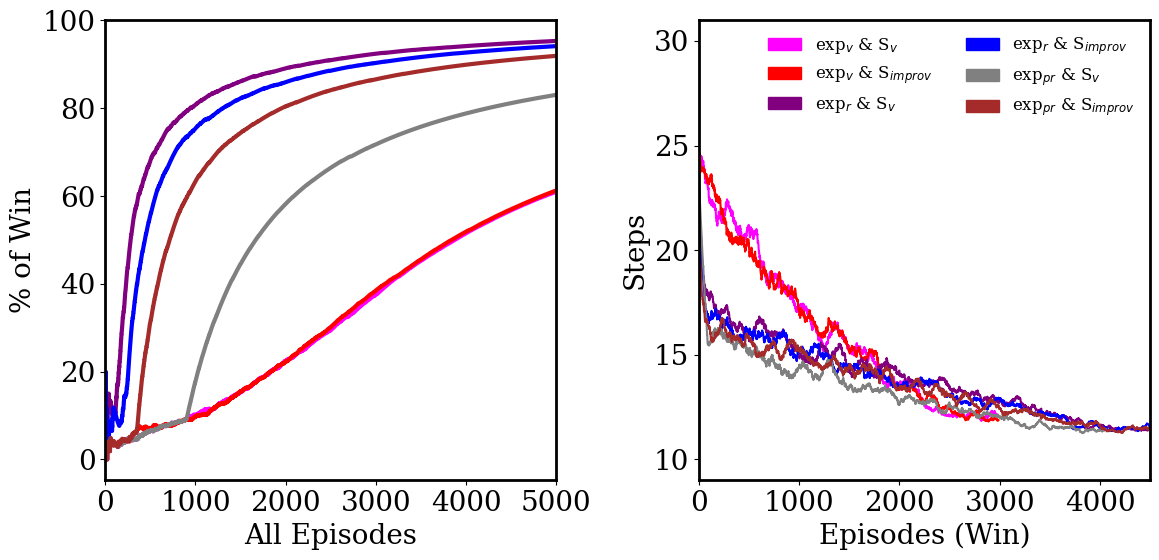

In [1042]:
random_actions_info_list = plot_random_moves_distribution(path,system_description,
                        marker = ['1','2','3','4','+','x'], 
                        colors = ['magenta','red','purple','blue','grey','brown'],
                        seeds=['sync_improv_False_vanilla_exploration_True_partially_blind_False_',
                                'sync_improv_True_vanilla_exploration_True_partially_blind_False_',
                                'sync_improv_False_vanilla_exploration_False_partially_blind_False_',
                                'sync_improv_True_vanilla_exploration_False_partially_blind_False_',
                                'sync_improv_False_vanilla_exploration_False_partially_blind_True_',
                                'sync_improv_True_vanilla_exploration_False_partially_blind_True_'])

In [750]:
len([val for val in np.array(random_actions_info_list[0])[0] if val == 1])


/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


31

In [775]:
num_random_in_episode_list_casewise = []
for case in random_actions_info_list:
    num_random_in_episode_list = []
    for each in np.array(case):
        num_random_in_episode = len([val for val in each if val == 1])
        num_random_in_episode_list.append(num_random_in_episode)
    num_random_in_episode_list_casewise.append(num_random_in_episode_list)

/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


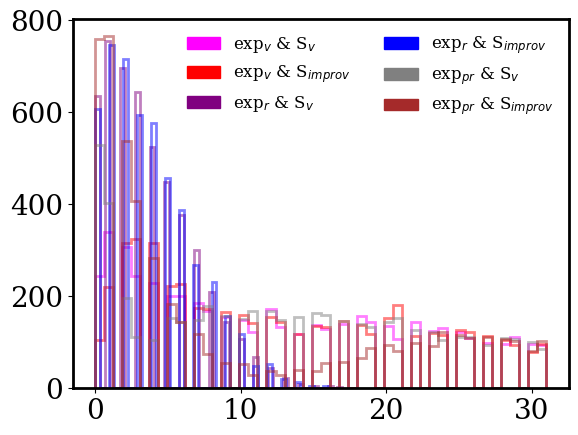

In [833]:
plt.style.use('seaborn-deep')
colors = ['magenta','red','purple','blue','grey','brown']
for color, i in zip(colors,num_random_in_episode_list_casewise):
    plt.hist(np.array(i), color=color, bins=50,alpha=0.5,histtype='step',fill=False,lw=2)

green_patch = mpatches.Patch(color=colors[0], label=r'exp$_v$ & S$_v$')
red_patch = mpatches.Patch(color=colors[1], label=r'exp$_v$ & S$_{improv}$')
purple_patch = mpatches.Patch(color=colors[2], label=r'exp$_r$ & S$_v$')
blue_patch = mpatches.Patch(color=colors[3], label=r'exp$_r$ & S$_{improv}$')
grey_patch = mpatches.Patch(color=colors[4], label=r'exp$_{pr}$ & S$_v$')
brown_patch = mpatches.Patch(color=colors[5], label=r'exp$_{pr}$ & S$_{improv}$')
    
plt.legend(handles=[green_patch,red_patch,purple_patch,blue_patch,grey_patch,brown_patch],ncol=2,
               frameon=False,fontsize=12)

fig.tight_layout()

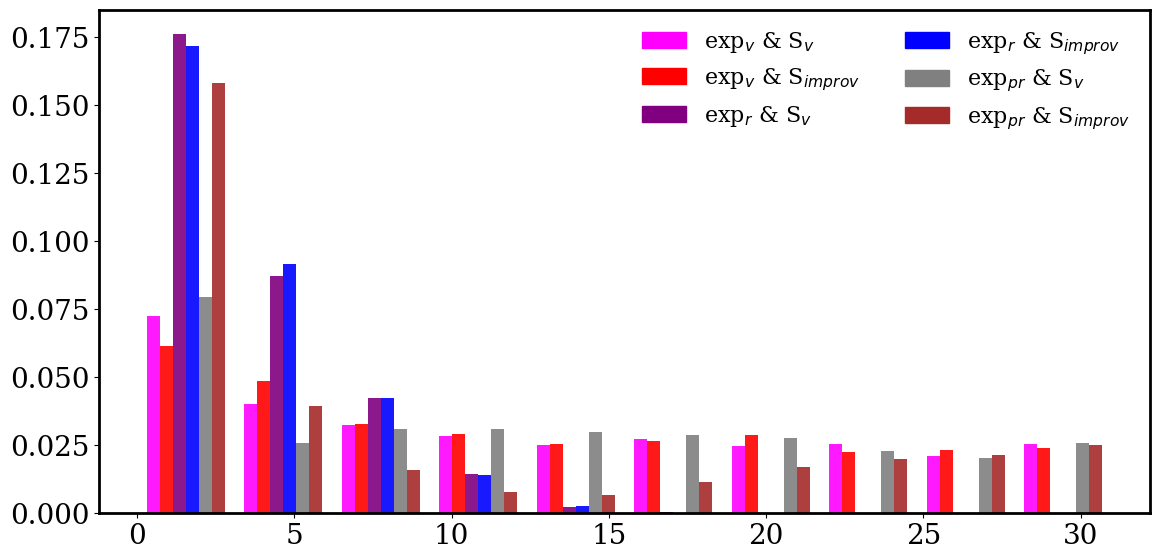

In [863]:
import matplotlib.font_manager as font_manager
import matplotlib
import matplotlib.pyplot as plt
import _pickle as cPickle

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['font.family'] = ['DejaVu Serif']
font = font_manager.FontProperties(family='DejaVu Serif',
                                       weight='normal',
                                       style='normal', size=20)

matplotlib.rc('axes', linewidth=2)
    
fig, ax = plt.subplots(figsize=(12,6),nrows=1)

    
plt.style.use('seaborn-deep')
colors = ['magenta','red','purple','blue','grey','brown']

ax.hist([num_random_in_episode_list_casewise[0],num_random_in_episode_list_casewise[1], num_random_in_episode_list_casewise[2],\
         num_random_in_episode_list_casewise[3],num_random_in_episode_list_casewise[4],num_random_in_episode_list_casewise[5]],\
         alpha=0.9,color=colors,density=True,lw=2,bins=10)

#histtype='step',fill=False,

green_patch = mpatches.Patch(color=colors[0], label=r'exp$_v$ & S$_v$')
red_patch = mpatches.Patch(color=colors[1], label=r'exp$_v$ & S$_{improv}$')
purple_patch = mpatches.Patch(color=colors[2], label=r'exp$_r$ & S$_v$')
blue_patch = mpatches.Patch(color=colors[3], label=r'exp$_r$ & S$_{improv}$')
grey_patch = mpatches.Patch(color=colors[4], label=r'exp$_{pr}$ & S$_v$')
brown_patch = mpatches.Patch(color=colors[5], label=r'exp$_{pr}$ & S$_{improv}$')
    
plt.legend(handles=[green_patch,red_patch,purple_patch,blue_patch,grey_patch,brown_patch],ncol=2,
frameon=False,fontsize=16)

fig.tight_layout()

plt.savefig('random_state_distribution.pdf',bbox_inches='tight')


Text(0, 0.5, 'Frequency')

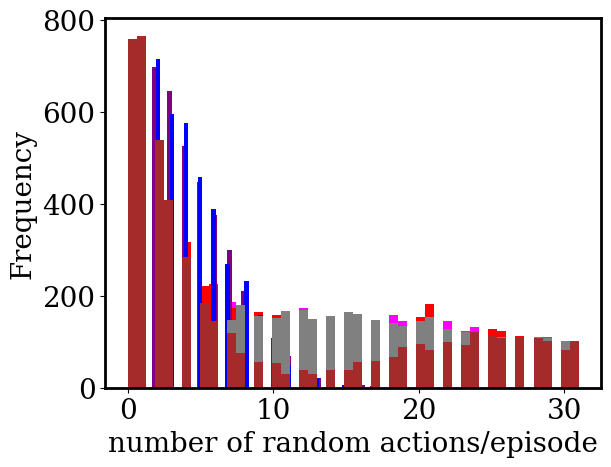

In [850]:

for color, each in zip(colors,num_random_in_episode_list_casewise):
    
    counts, bins = np.histogram(np.array(each).T,bins=50)
    plt.hist(bins[:-1], bins, weights=counts,color=color,rwidth=3)
#plt.xlim(6,31)
plt.xlabel('number of random actions/episode')
plt.ylabel('Frequency')
#plt.savefig('mover_per_game_histogram_%s_exit_reward_1_r2_1_d2_restrict_blind_expl.png' %(system))

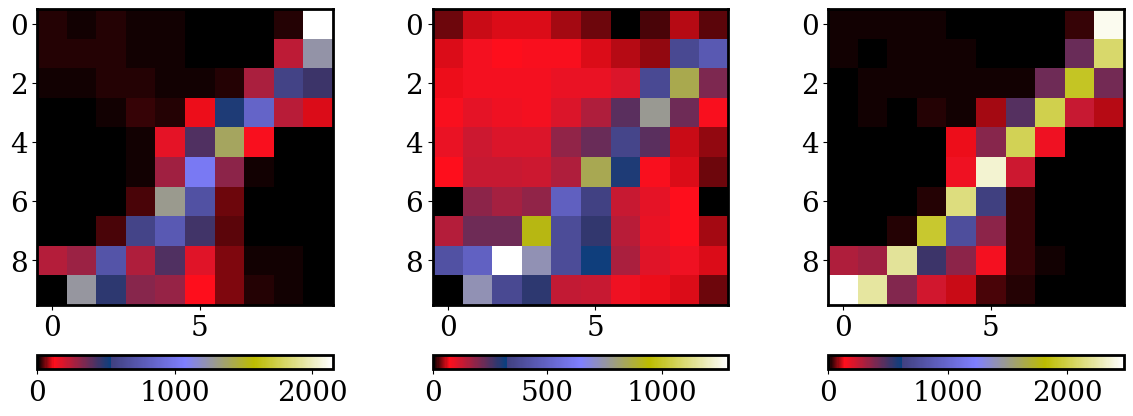

In [993]:
import matplotlib.font_manager as font_manager
import matplotlib
import matplotlib.pyplot as plt
import _pickle as cPickle
from mpl_toolkits.axes_grid1 import make_axes_locatable

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['font.family'] = ['DejaVu Serif']
font = font_manager.FontProperties(family='DejaVu Serif',
                                       weight='normal',
                                       style='normal', size=20)

matplotlib.rc('axes', linewidth=2)
   
with open("/home/biswajit/Documents/DeepRL/AutoDqn/x/random_actions_info_static_5000_epochs_2000_memsize_30_batch_size_600_sync_freq_1e-3_lr_leaky_func__S1_5_6_0_S2_5_6_9_S3_5_0_6_sync_improv_True_vanilla_exploration_False_partially_blind_True_.pickle", "rb") as input_file:
    random_actions_info = cPickle.load(input_file)

    
fig, axs = plt.subplots(figsize=(12,6),nrows=1, ncols=3)

def random_loc(arry, move_type='p'):
    mat = np.zeros((10,10))
    for _ in arry:
        #print(_.T[2])
        rand_type = _.T[2]
        loc = _.T[0]
        random_or_not = _.T[1]
        for ndx, each in enumerate(rand_type):
            if each == move_type:
                mat[loc[ndx][0]][loc[ndx][1]] += 1
    return mat

arry =  np.array([np.array(i,dtype=object) for i in random_actions_info],dtype=object).T

mat0 = axs[0].imshow(random_loc(arry,move_type='p'),cmap='gist_stern')
divider = make_axes_locatable(axs[0])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat0, cax=cax, orientation='horizontal')

mat1 = axs[1].imshow(random_loc(arry,move_type='pv'),cmap='gist_stern')
divider = make_axes_locatable(axs[1])
cax= divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat1, cax=cax, orientation='horizontal')

mat2 = axs[2].imshow(random_loc(arry,move_type='nr'),cmap='gist_stern')
divider = make_axes_locatable(axs[2])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat2, cax=cax, orientation='horizontal')
fig.tight_layout()
plt.savefig('random_types_location_wise_555_pr_true.png',dpi=600,bbox_inches='tight')

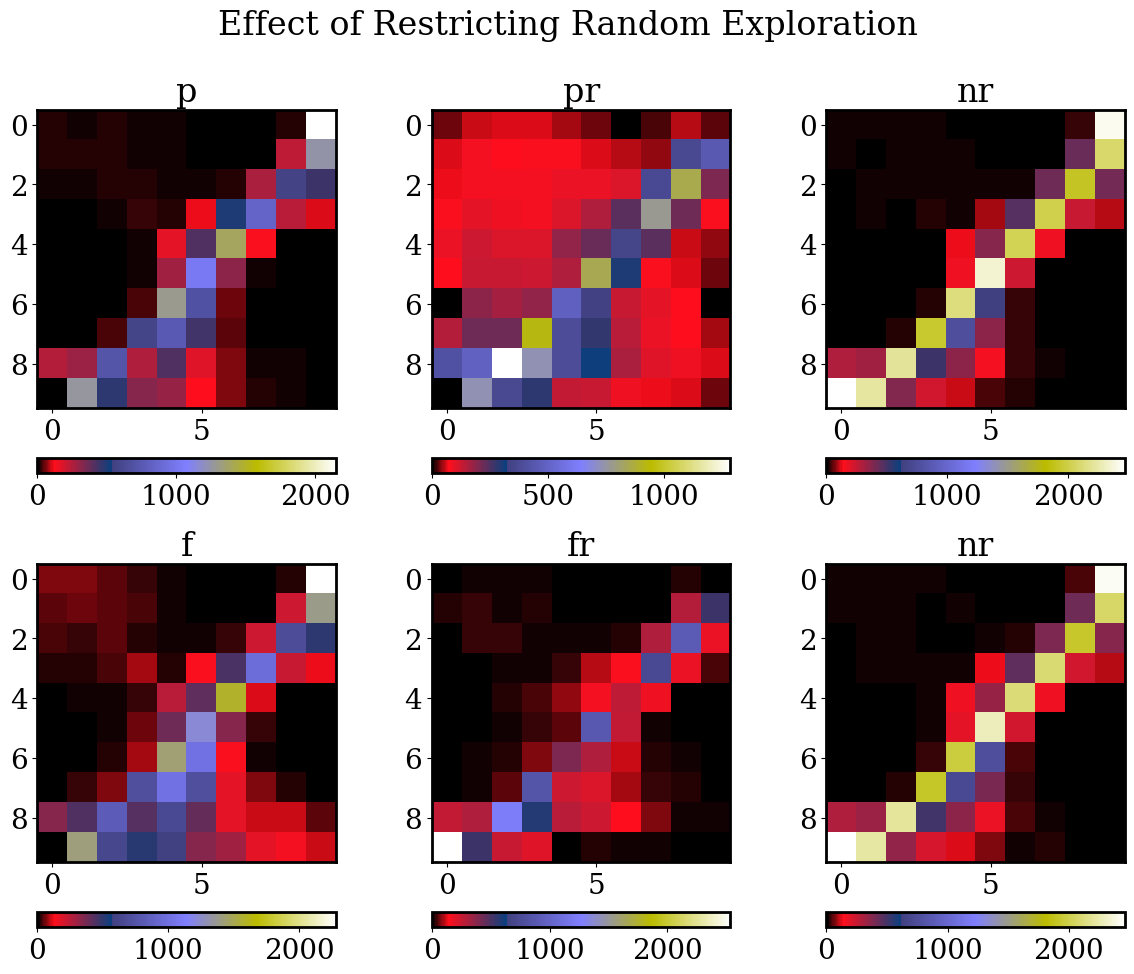

In [1018]:
import matplotlib.font_manager as font_manager
import matplotlib
import matplotlib.pyplot as plt
import _pickle as cPickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.025, hspace=0.05) 

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['font.family'] = ['DejaVu Serif']
font = font_manager.FontProperties(family='DejaVu Serif',
                                       weight='normal',
                                       style='normal', size=20)

matplotlib.rc('axes', linewidth=2)
   
with open("/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ep_1_s_1/\
random_actions_info_static_5000_epochs_2000_memsize_30_batch_size_600_\
sync_freq_1e-3_lr_leaky_func__S1_5_6_0_S2_5_6_9_S3_5_0_6_sync_improv_True_vanilla_exploration_False_partially_blind_True_.pickle", "rb") as input_file:
    random_actions_info = cPickle.load(input_file)
    
with open("/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ef_1_s_1/\
random_actions_info_static_5000_epochs_2000_memsize_30_batch_size_600_\
sync_freq_1e-3_lr_leaky_func__S1_5_6_0_S2_5_6_9_S3_5_0_6_sync_improv_True_vanilla_exploration_False_partially_blind_False_.pickle", "rb") as input_file:
    random_actions_info_f = cPickle.load(input_file)
    


    
fig, axs = plt.subplots(figsize=(12,10),nrows=2, ncols=3)

def random_loc(arry, move_type='p'):
    mat = np.zeros((10,10))
    for _ in arry:
        #print(_.T[2])
        rand_type = _.T[2]
        loc = _.T[0]
        random_or_not = _.T[1]
        for ndx, each in enumerate(rand_type):
            if each == move_type:
                mat[loc[ndx][0]][loc[ndx][1]] += 1
    return mat

arry =  np.array([np.array(i,dtype=object) for i in random_actions_info],dtype=object).T

mat0 = axs[0][0].imshow(random_loc(arry,move_type='p'),cmap='gist_stern')
divider = make_axes_locatable(axs[0][0])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat0, cax=cax, orientation='horizontal')

mat1 = axs[0][1].imshow(random_loc(arry,move_type='pv'),cmap='gist_stern')
divider = make_axes_locatable(axs[0][1])
cax= divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat1, cax=cax, orientation='horizontal')

mat2 = axs[0][2].imshow(random_loc(arry,move_type='nr'),cmap='gist_stern')
divider = make_axes_locatable(axs[0][2])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat2, cax=cax, orientation='horizontal')

arry =  np.array([np.array(i,dtype=object) for i in random_actions_info_f],dtype=object).T

mat0 = axs[1][0].imshow(random_loc(arry,move_type='f'),cmap='gist_stern')
divider = make_axes_locatable(axs[1][0])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat0, cax=cax, orientation='horizontal')

mat1 = axs[1][1].imshow(random_loc(arry,move_type='fv'),cmap='gist_stern')
divider = make_axes_locatable(axs[1][1])
cax= divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat1, cax=cax, orientation='horizontal')

mat2 = axs[1][2].imshow(random_loc(arry,move_type='nr'),cmap='gist_stern')
divider = make_axes_locatable(axs[1][2])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat2, cax=cax, orientation='horizontal')
plt.subplots_adjust(wspace=0, hspace=0)
axs[1][2].set_aspect('equal')
fig.suptitle('Effect of Restricting Random Exploration')

axs[0][0].set_title('p')
axs[0][1].set_title('pr')
axs[0][2].set_title('nr')

axs[1][0].set_title('f')
axs[1][1].set_title('fr')
axs[1][2].set_title('nr')


#ax2.title.set_text('Second Plot')
#ax3.title.set_text('Third Plot')
#ax4.title.set_text('Fourth Plot')

fig.tight_layout()
plt.savefig('random_types_location_wise_555_pr_true_false.png',dpi=600)

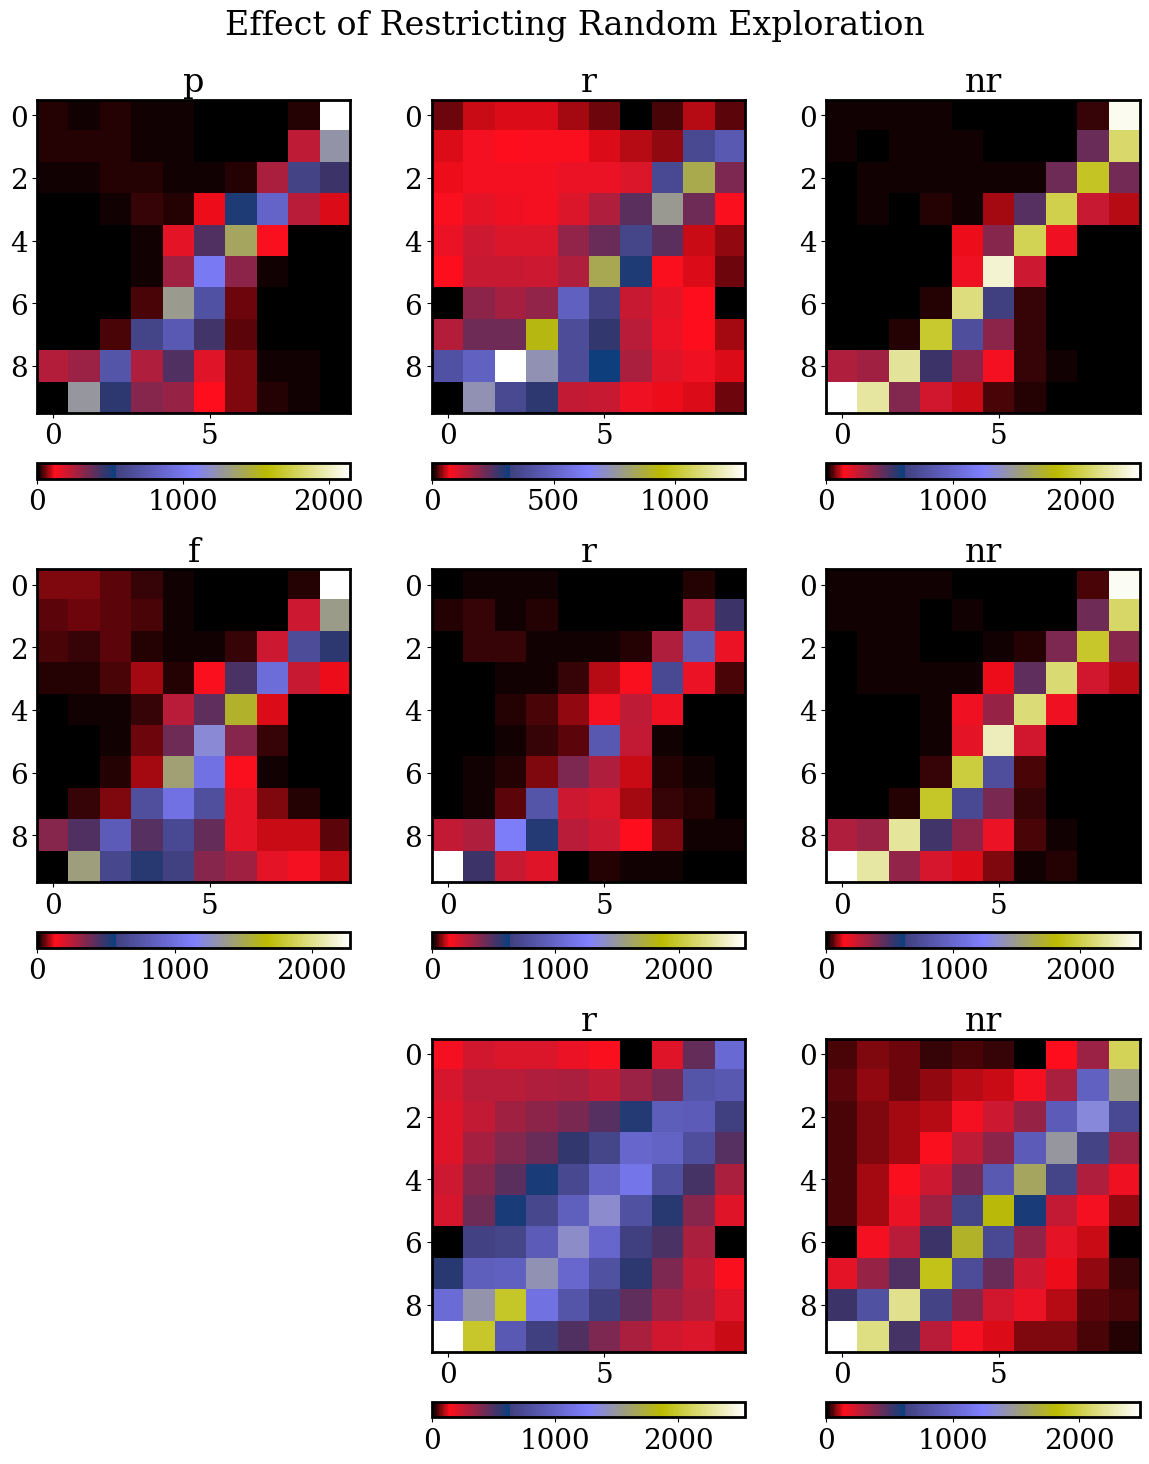

In [1029]:
import matplotlib.font_manager as font_manager
import matplotlib
import matplotlib.pyplot as plt
import _pickle as cPickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.025, hspace=0.05) 

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['font.family'] = ['DejaVu Serif']
font = font_manager.FontProperties(family='DejaVu Serif',
                                       weight='normal',
                                       style='normal', size=20)

matplotlib.rc('axes', linewidth=2)


with open("/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ep_1_s_1/\
random_actions_info_static_5000_epochs_2000_memsize_30_batch_size_600_\
sync_freq_1e-3_lr_leaky_func__S1_5_6_0_S2_5_6_9_S3_5_0_6_sync_improv_True_vanilla_exploration_False_partially_blind_True_.pickle", "rb") as input_file:
    random_actions_info = cPickle.load(input_file)
    
with open("/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ef_1_s_1/\
random_actions_info_static_5000_epochs_2000_memsize_30_batch_size_600_\
sync_freq_1e-3_lr_leaky_func__S1_5_6_0_S2_5_6_9_S3_5_0_6_sync_improv_True_vanilla_exploration_False_partially_blind_False_.pickle", "rb") as input_file:
    random_actions_info_f = cPickle.load(input_file)
    
with open("/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ev_1_s_1/\
random_actions_info_static_5000_epochs_2000_memsize_30_batch_size_600_\
sync_freq_1e-3_lr_leaky_func__S1_5_6_0_S2_5_6_9_S3_5_0_6_sync_improv_True_vanilla_exploration_True_partially_blind_False_.pickle", "rb") as input_file:
    random_actions_info_v = cPickle.load(input_file)


    
fig, axs = plt.subplots(figsize=(12,15),nrows=3, ncols=3)

def random_loc(arry, move_type='p'):
    mat = np.zeros((10,10))
    for _ in arry:
        rand_type = _.T[2]
        loc = _.T[0]
        random_or_not = _.T[1]
        for ndx, each in enumerate(rand_type):
            if each == move_type:
                mat[loc[ndx][0]][loc[ndx][1]] += 1
    return mat

arry =  np.array([np.array(i,dtype=object) for i in random_actions_info],dtype=object).T

mat0 = axs[0][0].imshow(random_loc(arry,move_type='p'),cmap='gist_stern')
divider = make_axes_locatable(axs[0][0])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat0, cax=cax, orientation='horizontal')

mat1 = axs[0][1].imshow(random_loc(arry,move_type='pv'),cmap='gist_stern')
divider = make_axes_locatable(axs[0][1])
cax= divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat1, cax=cax, orientation='horizontal')

mat2 = axs[0][2].imshow(random_loc(arry,move_type='nr'),cmap='gist_stern')
divider = make_axes_locatable(axs[0][2])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat2, cax=cax, orientation='horizontal')

arry =  np.array([np.array(i,dtype=object) for i in random_actions_info_f],dtype=object).T

mat0 = axs[1][0].imshow(random_loc(arry,move_type='f'),cmap='gist_stern')
divider = make_axes_locatable(axs[1][0])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat0, cax=cax, orientation='horizontal')

mat1 = axs[1][1].imshow(random_loc(arry,move_type='fv'),cmap='gist_stern')
divider = make_axes_locatable(axs[1][1])
cax= divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat1, cax=cax, orientation='horizontal')

mat2 = axs[1][2].imshow(random_loc(arry,move_type='nr'),cmap='gist_stern')
divider = make_axes_locatable(axs[1][2])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat2, cax=cax, orientation='horizontal')


arry =  np.array([np.array(i,dtype=object) for i in random_actions_info_v],dtype=object).T

mat0 = axs[2][1].imshow(random_loc(arry,move_type='v'),cmap='gist_stern')
divider = make_axes_locatable(axs[2][1])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat0, cax=cax, orientation='horizontal')

mat2 = axs[2][2].imshow(random_loc(arry,move_type='nr'),cmap='gist_stern')
divider = make_axes_locatable(axs[2][2])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat2, cax=cax, orientation='horizontal')

axs[0][0].set_title('p')
axs[0][1].set_title('r')
axs[0][2].set_title('nr')

axs[1][0].set_title('f')
axs[1][1].set_title('r')
axs[1][2].set_title('nr')

axs[2][1].set_title('r')
axs[2][2].set_title('nr')

fig.delaxes(axs[2,0])
fig.suptitle('Effect of Restricting Random Exploration')

plt.subplots_adjust(wspace=0, hspace=0)
#axs[1][1].set_aspect('equal')

fig.tight_layout()
plt.savefig('random_types_location_wise_555_pr_true_false_vanilla.png',dpi=600)

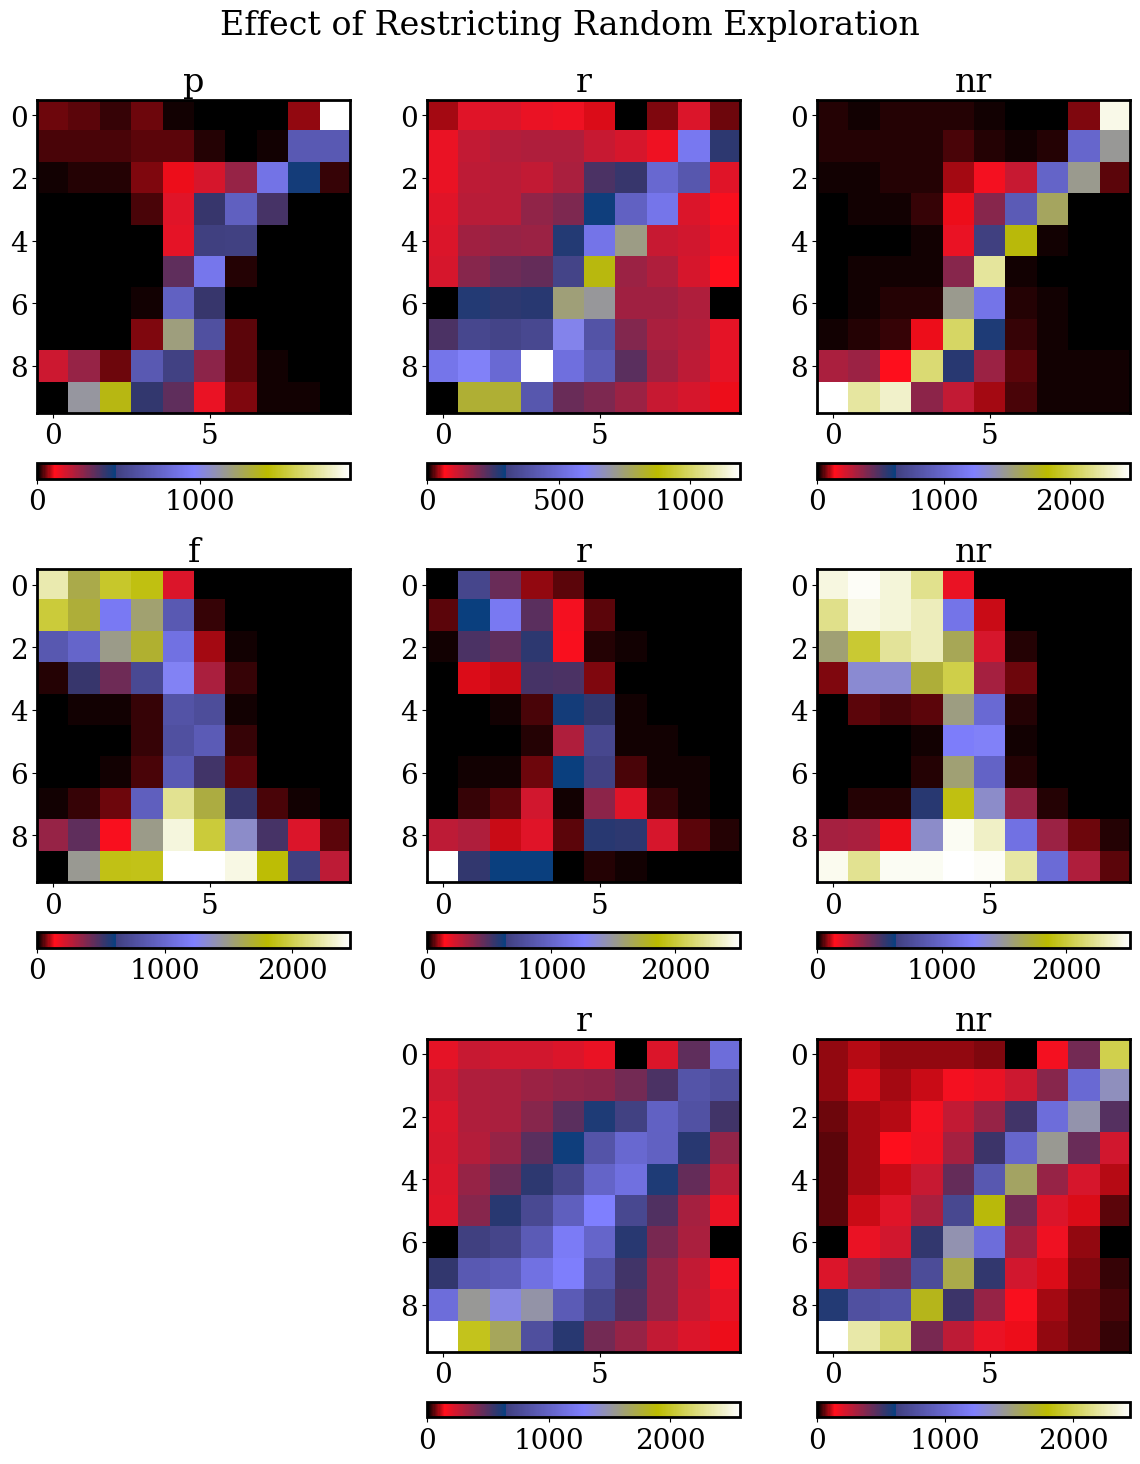

In [1043]:
# 25-5-5 
import matplotlib.font_manager as font_manager
import matplotlib
import matplotlib.pyplot as plt
import _pickle as cPickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.025, hspace=0.05) 

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['font.family'] = ['DejaVu Serif']
font = font_manager.FontProperties(family='DejaVu Serif',
                                       weight='normal',
                                       style='normal', size=20)

matplotlib.rc('axes', linewidth=2)


with open("/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ep_1_s_1/\
random_actions_info_static_5000_epochs_2000_memsize_30_batch_size_600_\
sync_freq_1e-3_lr_leaky_func__S1_25_6_0_S2_25_6_9_S3_5_0_6_sync_improv_True_vanilla_exploration_False_partially_blind_True_.pickle", "rb") as input_file:
    random_actions_info = cPickle.load(input_file)
    
with open("/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ef_1_s_1/\
random_actions_info_static_5000_epochs_2000_memsize_30_batch_size_600_\
sync_freq_1e-3_lr_leaky_func__S1_25_6_0_S2_25_6_9_S3_5_0_6_sync_improv_True_vanilla_exploration_False_partially_blind_False_.pickle", "rb") as input_file:
    random_actions_info_f = cPickle.load(input_file)
    
with open("/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ev_1_s_1/\
random_actions_info_static_5000_epochs_2000_memsize_30_batch_size_600_\
sync_freq_1e-3_lr_leaky_func__S1_25_6_0_S2_25_6_9_S3_5_0_6_sync_improv_True_vanilla_exploration_True_partially_blind_False_.pickle", "rb") as input_file:
    random_actions_info_v = cPickle.load(input_file)


    
fig, axs = plt.subplots(figsize=(12,15),nrows=3, ncols=3)

def random_loc(arry, move_type='p'):
    mat = np.zeros((10,10))
    for _ in arry:
        rand_type = _.T[2]
        loc = _.T[0]
        random_or_not = _.T[1]
        for ndx, each in enumerate(rand_type):
            if each == move_type:
                mat[loc[ndx][0]][loc[ndx][1]] += 1
    return mat

arry =  np.array([np.array(i,dtype=object) for i in random_actions_info],dtype=object).T

mat0 = axs[0][0].imshow(random_loc(arry,move_type='p'),cmap='gist_stern')
divider = make_axes_locatable(axs[0][0])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat0, cax=cax, orientation='horizontal')

mat1 = axs[0][1].imshow(random_loc(arry,move_type='pv'),cmap='gist_stern')
divider = make_axes_locatable(axs[0][1])
cax= divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat1, cax=cax, orientation='horizontal')

mat2 = axs[0][2].imshow(random_loc(arry,move_type='nr'),cmap='gist_stern')
divider = make_axes_locatable(axs[0][2])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat2, cax=cax, orientation='horizontal')

arry =  np.array([np.array(i,dtype=object) for i in random_actions_info_f],dtype=object).T

mat0 = axs[1][0].imshow(random_loc(arry,move_type='f'),cmap='gist_stern')
divider = make_axes_locatable(axs[1][0])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat0, cax=cax, orientation='horizontal')

mat1 = axs[1][1].imshow(random_loc(arry,move_type='fv'),cmap='gist_stern')
divider = make_axes_locatable(axs[1][1])
cax= divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat1, cax=cax, orientation='horizontal')

mat2 = axs[1][2].imshow(random_loc(arry,move_type='nr'),cmap='gist_stern')
divider = make_axes_locatable(axs[1][2])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat2, cax=cax, orientation='horizontal')


arry =  np.array([np.array(i,dtype=object) for i in random_actions_info_v],dtype=object).T

mat0 = axs[2][1].imshow(random_loc(arry,move_type='v'),cmap='gist_stern')
divider = make_axes_locatable(axs[2][1])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat0, cax=cax, orientation='horizontal')

mat2 = axs[2][2].imshow(random_loc(arry,move_type='nr'),cmap='gist_stern')
divider = make_axes_locatable(axs[2][2])
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(mat2, cax=cax, orientation='horizontal')

axs[0][0].set_title('p')
axs[0][1].set_title('r')
axs[0][2].set_title('nr')

axs[1][0].set_title('f')
axs[1][1].set_title('r')
axs[1][2].set_title('nr')

axs[2][1].set_title('r')
axs[2][2].set_title('nr')

fig.delaxes(axs[2,0])
fig.suptitle('Effect of Restricting Random Exploration')

plt.subplots_adjust(wspace=0, hspace=0)
#axs[1][1].set_aspect('equal')

fig.tight_layout()
plt.savefig('random_types_location_wise_25255_pr_true_false_vanilla.png',dpi=600)

/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide
/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide
/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide
/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid val

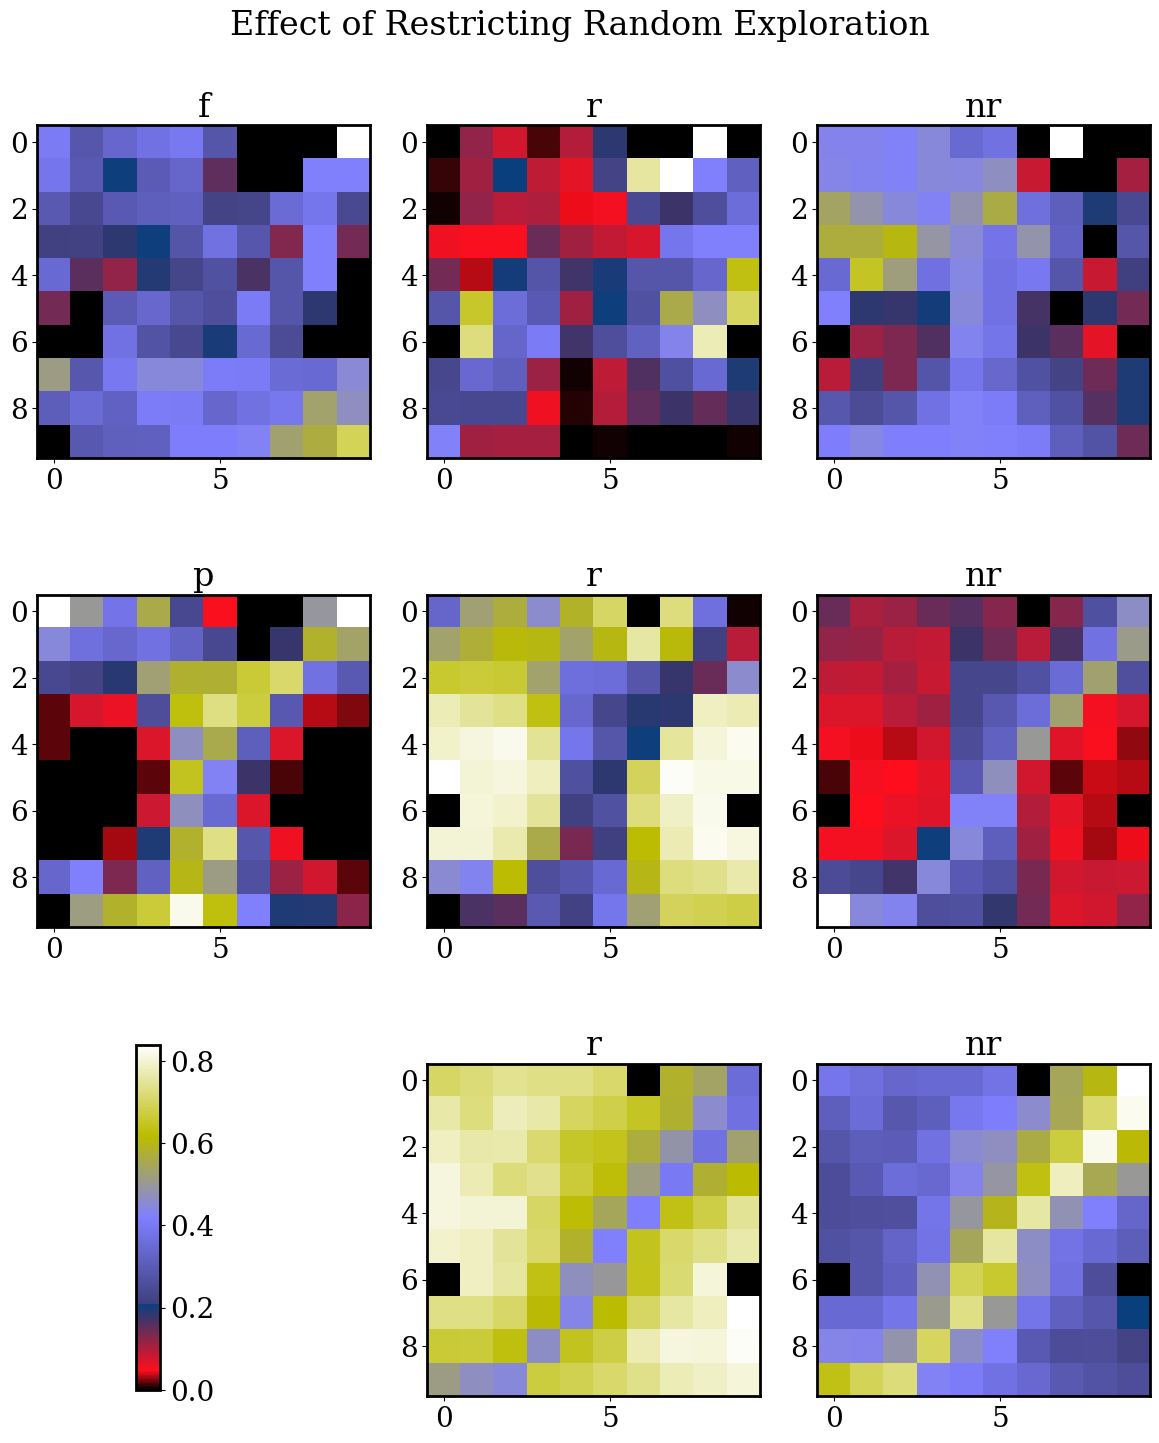

In [1098]:
# 25-5-5 
import matplotlib.font_manager as font_manager
import matplotlib
import matplotlib.pyplot as plt
import _pickle as cPickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.025, hspace=0.05) 

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['font.family'] = ['DejaVu Serif']
font = font_manager.FontProperties(family='DejaVu Serif',
                                       weight='normal',
                                       style='normal', size=20)

matplotlib.rc('axes', linewidth=2)


with open("/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ep_1_s_1/\
random_actions_info_static_5000_epochs_2000_memsize_30_batch_size_600_\
sync_freq_1e-3_lr_leaky_func__S1_25_6_0_S2_25_6_9_S3_5_0_6_sync_improv_True_vanilla_exploration_False_partially_blind_True_.pickle", "rb") as input_file:
    random_actions_info = cPickle.load(input_file)
    
with open("/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ef_1_s_1/\
random_actions_info_static_5000_epochs_2000_memsize_30_batch_size_600_\
sync_freq_1e-3_lr_leaky_func__S1_25_6_0_S2_25_6_9_S3_5_0_6_sync_improv_True_vanilla_exploration_False_partially_blind_False_.pickle", "rb") as input_file:
    random_actions_info_f = cPickle.load(input_file)
    
with open("/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/seed_3007_ev_1_s_1/\
random_actions_info_static_5000_epochs_2000_memsize_30_batch_size_600_\
sync_freq_1e-3_lr_leaky_func__S1_25_6_0_S2_25_6_9_S3_5_0_6_sync_improv_True_vanilla_exploration_True_partially_blind_False_.pickle", "rb") as input_file:
    random_actions_info_v = cPickle.load(input_file)


    
fig, axs = plt.subplots(figsize=(12,15),nrows=3, ncols=3)

def random_loc(arry, move_type='p'):
    mat = np.zeros((10,10))
    for _ in arry:
        rand_type = _.T[2]
        loc = _.T[0]
        random_or_not = _.T[1]
        for ndx, each in enumerate(rand_type):
            if each == move_type:
                mat[loc[ndx][0]][loc[ndx][1]] += 1
    return mat


###############
arry =  np.array([np.array(i,dtype=object) for i in random_actions_info_f],dtype=object).T
sum_mat = random_loc(arry,move_type='f')+random_loc(arry,move_type='fv')+random_loc(arry,move_type='nr')

f = random_loc(arry,move_type='f')/sum_mat
f[np.isnan(f)] =  0
fv = random_loc(arry,move_type='fv')/sum_mat
fv[np.isnan(fv)] =  0
nr = random_loc(arry,move_type='nr')/sum_mat
nr[np.isnan(nr)] =  0

mat0 = axs[0][0].imshow(f,cmap='gist_stern')


mat1 = axs[0][1].imshow(fv,cmap='gist_stern')
#divider = make_axes_locatable(axs[0][1])
#cax= divider.append_axes('bottom', size='5%', pad=0.5)
#fig.colorbar(mat1, cax=cax, orientation='horizontal')


mat2 = axs[0][2].imshow(nr,cmap='gist_stern')
#divider = make_axes_locatable(axs[0][2])
#cax = divider.append_axes('bottom', size='5%', pad=0.5)
#fig.colorbar(mat2, cax=cax, orientation='horizontal')

###############
arry =  np.array([np.array(i,dtype=object) for i in random_actions_info],dtype=object).T
sum_mat = random_loc(arry,move_type='p')+random_loc(arry,move_type='pv')+random_loc(arry,move_type='nr')

p = random_loc(arry,move_type='p')/sum_mat
p[np.isnan(p)] =  0
pv = random_loc(arry,move_type='pv')/sum_mat
pv[np.isnan(pv)] =  0
nr = random_loc(arry,move_type='nr')/sum_mat
nr[np.isnan(nr)] =  0

mat0 = axs[1][0].imshow(p,cmap='gist_stern')
#divider = make_axes_locatable(axs[1][0])
#cax = divider.append_axes('bottom', size='5%', pad=0.5)
#fig.colorbar(mat0, cax=cax, orientation='horizontal')

mat1 = axs[1][1].imshow(pv,cmap='gist_stern')
#divider = make_axes_locatable(axs[1][1])
#cax= divider.append_axes('bottom', size='5%', pad=0.5)
#fig.colorbar(mat1, cax=cax, orientation='horizontal')

mat2 = axs[1][2].imshow(nr,cmap='gist_stern')
#divider = make_axes_locatable(axs[1][2])
#cax = divider.append_axes('bottom', size='5%', pad=0.5)
#fig.colorbar(mat2, cax=cax, orientation='horizontal')
############
arry =  np.array([np.array(i,dtype=object) for i in random_actions_info_v],dtype=object).T
sum_mat = random_loc(arry,move_type='v')+random_loc(arry,move_type='nr')
v = random_loc(arry,move_type='v')/sum_mat
v[np.isnan(v)] =  0
nr = random_loc(arry,move_type='nr')/sum_mat
nr[np.isnan(nr)] =  0

mat0 = axs[2][1].imshow(v,cmap='gist_stern')
#divider = make_axes_locatable(axs[2][1])
#cax = divider.append_axes('bottom', size='5%', pad=0.5)
#fig.colorbar(mat0, cax=cax, orientation='horizontal')

mat2 = axs[2][2].imshow(nr,cmap='gist_stern')
#divider = make_axes_locatable(axs[2][2])
#cax = divider.append_axes('bottom', size='5%', pad=0.5)
#fig.colorbar(mat2, cax=cax, orientation='horizontal')



axs[0][0].set_title('f')
axs[0][1].set_title('r')
axs[0][2].set_title('nr')
axs[1][0].set_title('p')
axs[1][1].set_title('r')
axs[1][2].set_title('nr')
axs[2][1].set_title('r')
axs[2][2].set_title('nr')

#divider = make_axes_locatable(axs[2][0])
#cax = divider.append_axes('left', size='5%')

position=fig.add_axes([0.13,0.06,0.02,0.23])  ## the parameters are the specified position you set 

fig.colorbar(mat0,cax=position,shrink=0.2) ## 
#fig.colorbar(mat0, cax=cax, orientation='vertical',pad=12.0)
#fig.colorbar(mat0, orientation='vertical',pad=2.0)


fig.delaxes(axs[2,0])
fig.suptitle('Effect of Restricting Random Exploration')

plt.subplots_adjust(wspace=0, hspace=0)
#axs[1][1].set_aspect('equal')

fig.tight_layout()
plt.savefig('random_types_location_wise_25255_pr_true_false_vanilla_densitytrue.png',dpi=600)

/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide
/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide
/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide
/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid val

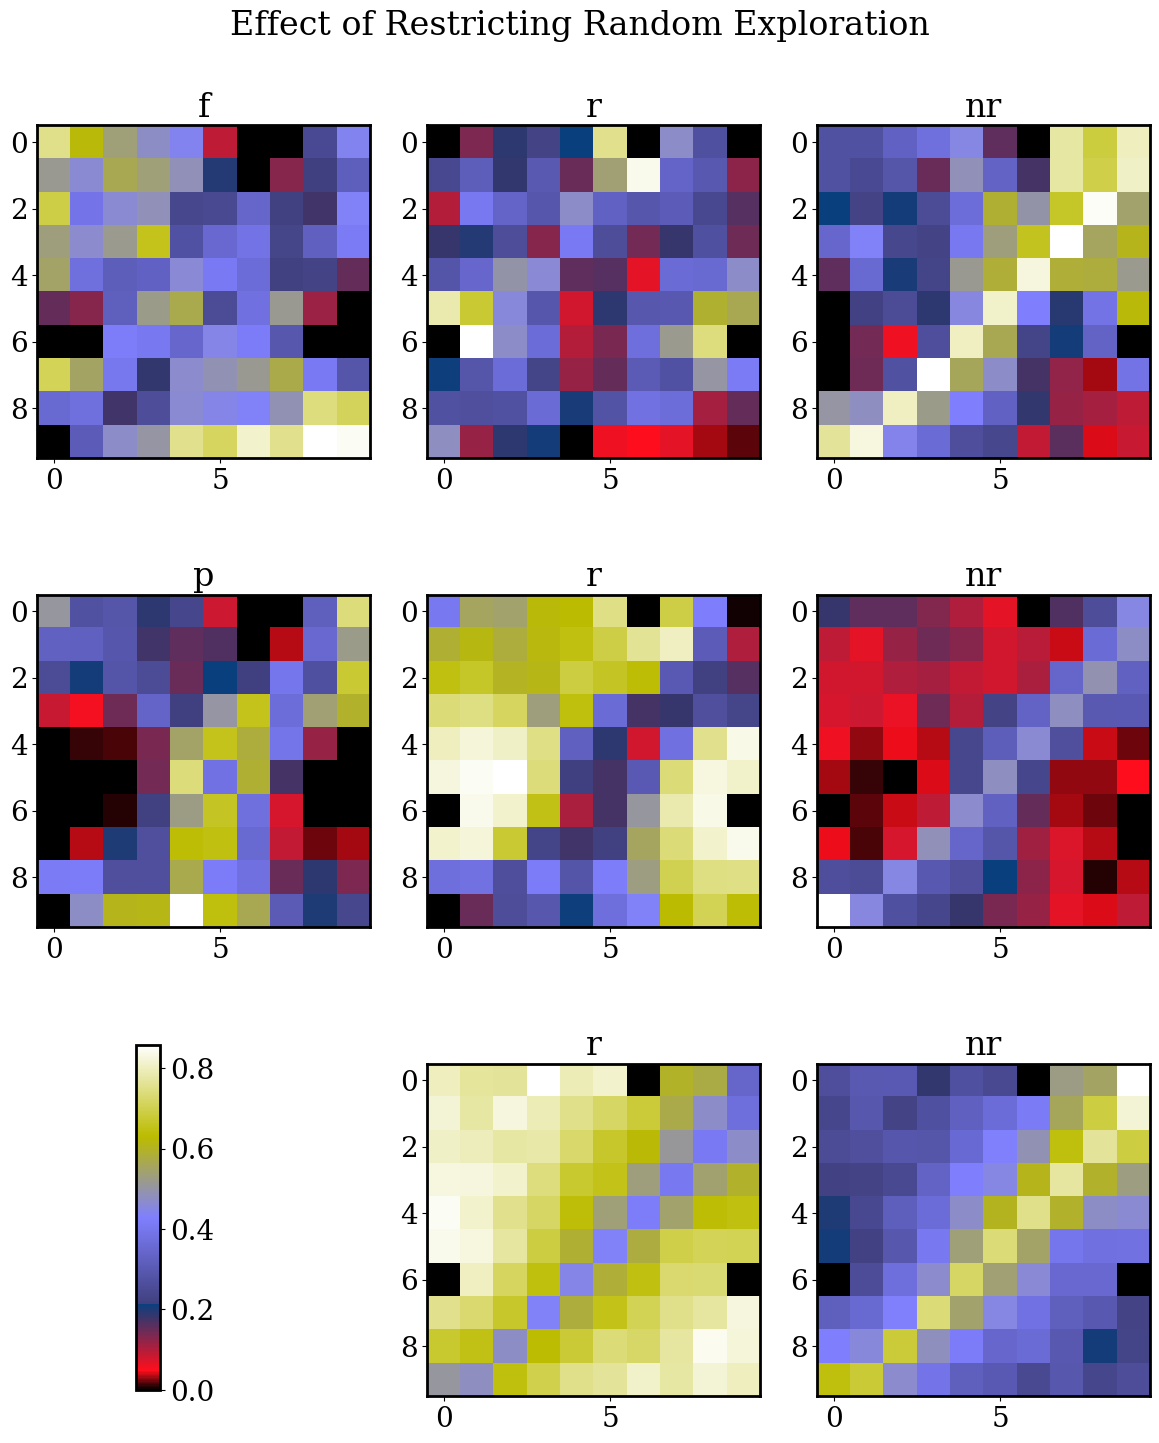

In [1099]:
# 25-5-5 
import matplotlib.font_manager as font_manager
import matplotlib
import matplotlib.pyplot as plt
import _pickle as cPickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.025, hspace=0.05) 

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['font.family'] = ['DejaVu Serif']
font = font_manager.FontProperties(family='DejaVu Serif',
                                       weight='normal',
                                       style='normal', size=20)

matplotlib.rc('axes', linewidth=2)


with open("/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ep_1_s_1/\
random_actions_info_static_5000_epochs_2000_memsize_30_batch_size_600_\
sync_freq_1e-3_lr_leaky_func__S1_5_6_0_S2_5_6_9_S3_5_0_6_sync_improv_True_vanilla_exploration_False_partially_blind_True_.pickle", "rb") as input_file:
    random_actions_info = cPickle.load(input_file)
    
with open("/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ef_1_s_1/\
random_actions_info_static_5000_epochs_2000_memsize_30_batch_size_600_\
sync_freq_1e-3_lr_leaky_func__S1_5_6_0_S2_5_6_9_S3_5_0_6_sync_improv_True_vanilla_exploration_False_partially_blind_False_.pickle", "rb") as input_file:
    random_actions_info_f = cPickle.load(input_file)
    
with open("/home/biswajit/Documents/DeepRL/AutoDqn/all_combinations_test/555/seed_3007_ev_1_s_1/\
random_actions_info_static_5000_epochs_2000_memsize_30_batch_size_600_\
sync_freq_1e-3_lr_leaky_func__S1_5_6_0_S2_5_6_9_S3_5_0_6_sync_improv_True_vanilla_exploration_True_partially_blind_False_.pickle", "rb") as input_file:
    random_actions_info_v = cPickle.load(input_file)


    
fig, axs = plt.subplots(figsize=(12,15),nrows=3, ncols=3)

def random_loc(arry, move_type='p'):
    mat = np.zeros((10,10))
    for _ in arry:
        rand_type = _.T[2]
        loc = _.T[0]
        random_or_not = _.T[1]
        for ndx, each in enumerate(rand_type):
            if each == move_type:
                mat[loc[ndx][0]][loc[ndx][1]] += 1
    return mat


###############
arry =  np.array([np.array(i,dtype=object) for i in random_actions_info_f],dtype=object).T
sum_mat = random_loc(arry,move_type='f')+random_loc(arry,move_type='fv')+random_loc(arry,move_type='nr')

f = random_loc(arry,move_type='f')/sum_mat
f[np.isnan(f)] =  0
fv = random_loc(arry,move_type='fv')/sum_mat
fv[np.isnan(fv)] =  0
nr = random_loc(arry,move_type='nr')/sum_mat
nr[np.isnan(nr)] =  0

mat0 = axs[0][0].imshow(f,cmap='gist_stern')


mat1 = axs[0][1].imshow(fv,cmap='gist_stern')
#divider = make_axes_locatable(axs[0][1])
#cax= divider.append_axes('bottom', size='5%', pad=0.5)
#fig.colorbar(mat1, cax=cax, orientation='horizontal')


mat2 = axs[0][2].imshow(nr,cmap='gist_stern')
#divider = make_axes_locatable(axs[0][2])
#cax = divider.append_axes('bottom', size='5%', pad=0.5)
#fig.colorbar(mat2, cax=cax, orientation='horizontal')

###############
arry =  np.array([np.array(i,dtype=object) for i in random_actions_info],dtype=object).T
sum_mat = random_loc(arry,move_type='p')+random_loc(arry,move_type='pv')+random_loc(arry,move_type='nr')

p = random_loc(arry,move_type='p')/sum_mat
p[np.isnan(p)] =  0
pv = random_loc(arry,move_type='pv')/sum_mat
pv[np.isnan(pv)] =  0
nr = random_loc(arry,move_type='nr')/sum_mat
nr[np.isnan(nr)] =  0

mat0 = axs[1][0].imshow(p,cmap='gist_stern')
#divider = make_axes_locatable(axs[1][0])
#cax = divider.append_axes('bottom', size='5%', pad=0.5)
#fig.colorbar(mat0, cax=cax, orientation='horizontal')

mat1 = axs[1][1].imshow(pv,cmap='gist_stern')
#divider = make_axes_locatable(axs[1][1])
#cax= divider.append_axes('bottom', size='5%', pad=0.5)
#fig.colorbar(mat1, cax=cax, orientation='horizontal')

mat2 = axs[1][2].imshow(nr,cmap='gist_stern')
#divider = make_axes_locatable(axs[1][2])
#cax = divider.append_axes('bottom', size='5%', pad=0.5)
#fig.colorbar(mat2, cax=cax, orientation='horizontal')
############
arry =  np.array([np.array(i,dtype=object) for i in random_actions_info_v],dtype=object).T
sum_mat = random_loc(arry,move_type='v')+random_loc(arry,move_type='nr')
v = random_loc(arry,move_type='v')/sum_mat
v[np.isnan(v)] =  0
nr = random_loc(arry,move_type='nr')/sum_mat
nr[np.isnan(nr)] =  0

mat0 = axs[2][1].imshow(v,cmap='gist_stern')
#divider = make_axes_locatable(axs[2][1])
#cax = divider.append_axes('bottom', size='5%', pad=0.5)
#fig.colorbar(mat0, cax=cax, orientation='horizontal')

mat2 = axs[2][2].imshow(nr,cmap='gist_stern')
#divider = make_axes_locatable(axs[2][2])
#cax = divider.append_axes('bottom', size='5%', pad=0.5)
#fig.colorbar(mat2, cax=cax, orientation='horizontal')



axs[0][0].set_title('f')
axs[0][1].set_title('r')
axs[0][2].set_title('nr')
axs[1][0].set_title('p')
axs[1][1].set_title('r')
axs[1][2].set_title('nr')
axs[2][1].set_title('r')
axs[2][2].set_title('nr')

#divider = make_axes_locatable(axs[2][0])
#cax = divider.append_axes('left', size='5%')

position=fig.add_axes([0.13,0.06,0.02,0.23])  ## the parameters are the specified position you set 

fig.colorbar(mat0,cax=position,shrink=0.2) ## 
#fig.colorbar(mat0, cax=cax, orientation='vertical',pad=12.0)
#fig.colorbar(mat0, orientation='vertical',pad=2.0)


fig.delaxes(axs[2,0])
fig.suptitle('Effect of Restricting Random Exploration')

plt.subplots_adjust(wspace=0, hspace=0)
#axs[1][1].set_aspect('equal')

fig.tight_layout()
plt.savefig('random_types_location_wise_555_pr_true_false_vanilla_densitytrue.png',dpi=600)